In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import display # Allows the use of display() for DataFrames
from time import time
import matplotlib.pyplot as plt
import seaborn as sns # Plotting library
from scipy import stats
from collections import Counter
import json
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import *
from scipy.stats import pointbiserialr

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
import json

In [7]:
data_train = pd.read_csv("/home/yuva/Desktop/train.csv")
data_test = pd.read_csv("/home/yuva/Desktop/test.csv")

In [533]:
len(data_train)

3000

In [486]:
features_to_explore = ['budget', 'popularity', 'runtime']



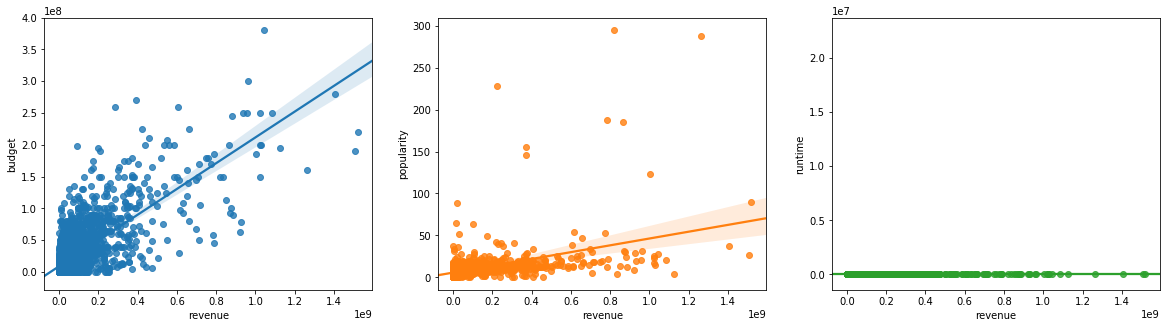

In [366]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

for col,feature in enumerate(features_to_explore):
    myplot=sns.regplot(x='revenue',y=feature,data=data_train,ax=ax[col])

In [32]:
cleaned_train=data_train.copy()
cleaned_test=data_test.copy()

len(cleaned_train)

3000

In [33]:
runtime_mean = data_train['runtime'].mean()

## Train data
cleaned_train['runtime'] = cleaned_train['runtime'].replace(np.nan, runtime_mean)
## Test data
cleaned_test['runtime'] =cleaned_test['runtime'].replace(np.nan, runtime_mean)

In [34]:
cleaned_train['release_date']=pd.to_datetime(cleaned_train['release_date'],format='%m/%d/%y')
cleaned_test['release_date']=pd.to_datetime(cleaned_test['release_date'],format='%m/%d/%y')

cleaned_train['release_month']=cleaned_train['release_date'].apply(lambda x : x.month)
cleaned_train['release_year']=cleaned_train['release_date'].apply(lambda x : x.year)
cleaned_train['release_day']=cleaned_train['release_date'].apply(lambda x : x.day)

cleaned_test['release_month']=cleaned_test['release_date'].apply(lambda x : x.month)
cleaned_test['release_year']=cleaned_test['release_date'].apply(lambda x : x.year)
cleaned_test['release_day']=cleaned_test['release_date'].apply(lambda x : x.day)
len(cleaned_test.columns)
print(len(cleaned_train.columns))

26


In [35]:
cleaned_train['homepage']=cleaned_train['homepage'].apply(lambda x: 1 if x!=np.nan else 0)
cleaned_test['homepage']=cleaned_test['homepage'].apply(lambda x: 1 if x!=np.nan else 0)

cleaned_train['poster_path']=cleaned_train['poster_path'].apply(lambda x: 1 if x!=np.nan else 0)
cleaned_test['poster_path']=cleaned_test['poster_path'].apply(lambda x: 1 if x!=np.nan else 0)

cleaned_train['belongs_to_collection']=cleaned_train['belongs_to_collection'].apply(lambda x: 1 if x!=np.nan else 0)
cleaned_test['belongs_to_collection']=cleaned_test['belongs_to_collection'].apply(lambda x: 1 if x!=np.nan else 0)

print(len(cleaned_train.columns))
len(cleaned_test.columns)


26


25

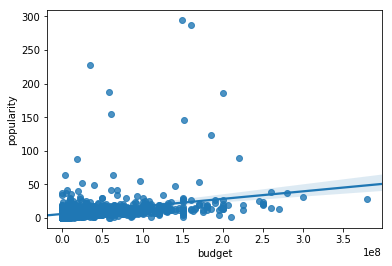

In [371]:
features=['poster_path']

for col,feature in enumerate(features):
    myplot=sns.regplot(x='budget',y='popularity',data=cleaned_train)

In [36]:
cleaned_test
import json
from collections import defaultdict
def callfunc(x,idd,pp):
    if isinstance(x,float):
        x="[{'id': 18, 'name': 'Drama'}]"
    x=x.replace('\'','\"')
    x=pd.DataFrame(json.loads(x))
    y=x['name']
   
    pp['id'][idd]=idd
    for key,val in y.iteritems():
        pp['genres_'+str(val)][idd]=1
    pp['num_genres'][idd]=len(y)
pd.set_option('display.max_columns', 999)
pp=defaultdict(dict)
cleaned_test.T.apply(lambda x:callfunc(x['genres'],x['id'],pp))
cleaned_test=pd.merge(cleaned_test,pd.DataFrame(pp),on='id')

pp=defaultdict(dict)
cleaned_train.T.apply(lambda x:callfunc(x['genres'],x['id'],pp))
cleaned_train=pd.merge(cleaned_train,pd.DataFrame(pp),on='id')
# print(len(cleaned_train.columns))
# print(len(cleaned_test.columns))
# cleaned_train.head(n=1)
# cleaned_test.head(n=1)

In [453]:
cleaned_train.head(n=1)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_month,release_year,release_day,genres_Action_x,genres_Adventure_x,genres_Animation_x,genres_Comedy_x,genres_Crime_x,genres_Documentary_x,genres_Drama_x,genres_Family_x,genres_Fantasy_x,genres_Foreign_x,genres_History_x,genres_Horror_x,genres_Music_x,genres_Mystery_x,genres_Romance_x,genres_Science Fiction_x,genres_TV Movie_x,genres_Thriller_x,genres_War_x,genres_Western_x,num_genres_x,genres_Action_y,genres_Adventure_y,genres_Animation_y,genres_Comedy_y,genres_Crime_y,genres_Documentary_y,genres_Drama_y,genres_Family_y,genres_Fantasy_y,genres_Foreign_y,genres_History_y,genres_Horror_y,genres_Music_y,genres_Mystery_y,genres_Romance_y,genres_Science Fiction_y,genres_TV Movie_y,genres_Thriller_y,genres_War_y,genres_Western_y,num_genres_y
0,1,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",1,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,1,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2,2015,20,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [37]:
cleaned_test
import json
from collections import defaultdict
def callfunc(x,idd,pp):
    if isinstance(x,float):
        x="[{'iso_639_1': 'en', 'name': 'English'}]"
    elif x=="":
        x.fillna("[{'iso_639_1': 'en', 'name': 'English'}]")
    x=x.replace('\'','\"')
    x=pd.DataFrame(json.loads(x))
    y=x['name']
   
    pp['id'][idd]=idd
    for key,val in y.iteritems():
        
        pp['spoken_languages_'+str(val)][idd]=1
    pp['spoken_languages_num'][idd]=len(y)

pd.set_option('display.max_columns', 999)
pp=defaultdict(dict)
cleaned_test.T.apply(lambda x:callfunc(x['spoken_languages'],x['id'],pp))
cleaned_test=pd.merge(cleaned_test,pd.DataFrame(pp),on='id')

pp=defaultdict(dict)
cleaned_train.T.apply(lambda x:callfunc(x['spoken_languages'],x['id'],pp))
cleaned_train=pd.merge(cleaned_train,pd.DataFrame(pp),on='id')
# print(len(cleaned_train.columns))
# print(len(cleaned_test.columns))
# cleaned_train.head(n=2)

In [ ]:
cleaned_train.head(n=3)

In [38]:
import json
from collections import defaultdict
def callfunc(x,idd,pp):
    try:
        if isinstance(x,float):
            x="[{'iso_3166_1': 'US', 'name': 'United States of America'}]"
#         x=x.replace('\'','\"')
        x=pd.DataFrame(ast.literal_eval(x))
        y=x['name']

        pp['id'][idd]=idd
        for key,val in y.iteritems():
            pp['production_countries_'+str(val)][idd]=1
        pp['num_prod_countries'][idd]=len(y)
    except:
        pass

pd.set_option('display.max_columns', 999)
pp=defaultdict(dict)
cleaned_test.T.apply(lambda x:callfunc(x['production_countries'],x['id'],pp))
cleaned_test=pd.merge(cleaned_test,pd.DataFrame(pp),on='id')

pp=defaultdict(dict)
cleaned_train.T.apply(lambda x:callfunc(x['production_countries'],x['id'],pp))
cleaned_train=pd.merge(cleaned_train,pd.DataFrame(pp),on='id')
# print(len(cleaned_train.columns))
# print(len(cleaned_test.columns))
# cleaned_train.head()

In [39]:
import json
from collections import defaultdict
import ast
def callfunc(x,idd,pp):

    if isinstance(x,float):
        x="[{'id': 4379, 'name': 'time travel'}]"
        pp['num_Keywords'][idd]=1
#     x=x.replace('\'','\"')
    x=pd.DataFrame(ast.literal_eval(x))
    y=x['name']

    pp['id'][idd]=idd
    for key,val in y.iteritems():

        pp['Keywords_'+str(val)][idd]=1
    pp['num_Keywords'][idd]=len(y)
    


pd.set_option('display.max_columns', 999)
pp=defaultdict(dict)
cleaned_test.T.apply(lambda x:callfunc(x['Keywords'],x['id'],pp))
cleaned_test=pd.merge(cleaned_test,pd.DataFrame(pp),on='id')

pp=defaultdict(dict)
cleaned_train.T.apply(lambda x:callfunc(x['Keywords'],x['id'],pp))
cleaned_train=pd.merge(cleaned_train,pd.DataFrame(pp),on='id')
# print(len(cleaned_train.columns))
# print(len(cleaned_test.columns))
# cleaned_train.head(n=3)

In [40]:
import json
from collections import defaultdict
import ast
def callfunc(x,idd,pp):
    
    if isinstance(x,float) or x=="[]":
        x="[{'cast_id': 4379, 'name': 'time travel'}]"
        pp['num_cast'][idd]=1
#     x=x.replace('\'','\"')
    x=pd.DataFrame(ast.literal_eval(x))
    y=x['cast_id']

    pp['id'][idd]=idd
    for key,val in y.iteritems():

        pp['cast_'+str(val)][idd]=1
    pp['num_cast'][idd]=len(y)
    
pp=defaultdict(dict)
cleaned_train.T.apply(lambda x:callfunc(x['cast'],x['id'],pp))
cleaned_train=pd.merge(cleaned_train,pd.DataFrame(pp),on='id')

pd.set_option('display.max_columns', 999)
pp=defaultdict(dict)
cleaned_test.T.apply(lambda x:callfunc(x['cast'],x['id'],pp))
cleaned_test=pd.merge(cleaned_test,pd.DataFrame(pp),on='id')

# print(len(cleaned_train.columns))
# print(len(cleaned_test.columns))
# cleaned_train.head(n=2)

In [588]:
cleaned_test['id'].to_csv("idforred.csv")

/home/yuva/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [41]:
cleaned_train=cleaned_train.drop(['id','belongs_to_collection','genres','imdb_id','original_title','overview','production_companies',
                                  'production_countries','release_date','spoken_languages','status',
                                 'tagline','title','Keywords',
                                    'cast','crew'],axis=1)

cleaned_test=cleaned_test.drop(['id','belongs_to_collection','genres','imdb_id','original_title','overview','production_companies',
                                  'production_countries','release_date','spoken_languages','status',
                                 'tagline','title','Keywords',
                                    'cast','crew'],axis=1)
cleaned_train.head()

,budget,homepage,original_language,popularity,poster_path,runtime,revenue,release_month,release_year,release_day,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,genres_Fantasy,genres_Foreign,genres_History,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science Fiction,genres_TV Movie,genres_Thriller,genres_War,genres_Western,num_genres,spoken_languages_,spoken_languages_Afrikaans,spoken_languages_Bahasa indonesia,spoken_languages_Català,spoken_languages_Dansk,spoken_languages_Deutsch,spoken_languages_Eesti,spoken_languages_English,spoken_languages_Español,spoken_languages_Esperanto,spoken_languages_Français,spoken_languages_Gaeilge,spoken_languages_Hrvatski,spoken_languages_Italiano,spoken_languages_Kiswahili,spoken_languages_Latin,spoken_languages_Magyar,spoken_languages_Nederlands,spoken_languages_No Language,spoken_languages_Norsk,spoken_languages_Polski,spoken_languages_Português,spoken_languages_Pусский,spoken_languages_Română,spoken_languages_Slovenčina,spoken_languages_Somali,spoken_languages_Srpski,spoken_languages_Tiếng Việt,spoken_languages_Türkçe,spoken_languages_Wolof,spoken_languages_euskera,spoken_languages_isiZulu,spoken_languages_num,spoken_languages_shqip,spoken_languages_suomi,spoken_languages_svenska,spoken_languages_Íslenska,spoken_languages_Český,spoken_languages_ελληνικά,spoken_languages_Український,spoken_languages_български език,spoken_languages_қазақ,spoken_languages_עִבְרִית,spoken_languages_اردو,spoken_languages_العربية,spoken_languages_فارسی,spoken_languages_پښتو,spoken_languages_हिन्दी,spoken_languages_বাংলা,spoken_languages_ਪੰਜਾਬੀ,spoken_languages_தமிழ்,spoken_languages_తెలుగు,spoken_languages_ภาษาไทย,spoken_languages_广州话 / 廣州話,spoken_languages_日本語,spoken_languages_普通话,spoken_languages_한국어/조선말,num_prod_countries,production_countries_Algeria,production_countries_Argentina,production_countries_Australia,production_countries_Austria,production_countries_Bahamas,production_countries_Belgium,production_countries_Bosnia and Herzegovina,production_countries_Brazil,production_countries_Bulgaria,production_countries_Burkina Faso,production_countries_Cambodia,production_countries_Canada,production_countries_Chile,production_countries_China,production_countries_Costa Rica,production_countries_Croatia,production_countries_Cyprus,production_countries_Czech Republic,production_countries_Denmark,production_countries_Ethiopia,production_countries_Finland,production_countries_France,production_countries_Germany,production_countries_Ghana,production_countries_Greece,production_countries_Hong Kong,production_countries_Hungary,production_countries_Iceland,production_countries_India,production_countries_Indonesia,production_countries_Iran,production_countries_Ireland,production_countries_Israel,production_countries_Italy,production_countries_Japan,production_countries_Jordan,production_countries_Luxembourg,production_countries_Malta,production_countries_Mauritania,production_countries_Mexico,production_countries_Mongolia,production_countries_Morocco,production_countries_Namibia,production_countries_Netherlands,production_countries_New Zealand,production_countries_Norway,production_countries_Pakistan,production_countries_Paraguay,production_countries_Peru,production_countries_Philippines,production_countries_Poland,production_countries_Portugal,production_countries_Puerto Rico,production_countries_Qatar,production_countries_Romania,production_countries_Russia,production_countries_Saudi Arabia,production_countries_Serbia,production_countries_Serbia and Montenegro,production_countries_Singapore,production_countries_Slovenia,production_countries_South Africa,production_countries_South Korea,production_countries_Spain,production_countries_Sweden,production_countries_Switzerland,production_countries_Taiwan,production_countries_Tunisia,production_countries_Turkey,production_countries_Ukraine,production_countries_United Arab Emirates,pro

In [42]:
d={'ar':1,'bn':2,
'cn':3,
'cs':4,
'da':5,
'de':6,
'el':7,
'en':8,
'es':9,
'fa':10,
'fi':11,
'fr':12,
'he':13,
'hi':14,
'hu':15,
'id':16,
'it':17,
'ja':18,
'ko':19,
'ml':20,
'mr':21,
'nb':22,
'nl':23,
'no':24,
'pl':25,
'pt':26,
'ro':27,
'ru':28,
'sr':29,
'sv':30,
'ta':31,
'te':32,
'tr':33,
'ur':34,
'vi':35,
'zh':36}

In [43]:
cleaned_train['original_language']=cleaned_train['original_language'].map(d)
cleaned_test['original_language']=cleaned_test['original_language'].map(d)


In [44]:
cleaned_train=cleaned_train.fillna(0)
cleaned_test=cleaned_test.fillna(0)

In [45]:
for col in cleaned_train.columns:
#     print(col,pointbiserialr(cleaned_train[col],cleaned_train['revenue'])[0])
    if pointbiserialr(cleaned_train[col],cleaned_train['revenue'])[0] < 0.1:
        cleaned_train.drop([col], axis=1,inplace=True)
    

/home/yuva/.local/lib/python3.5/site-packages/scipy/stats/stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [505]:
cleaned_train['genres']

0                          [{'id': 35, 'name': 'Comedy'}]
1       [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                           [{'id': 18, 'name': 'Drama'}]
3       [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4       [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
5       [{'id': 16, 'name': 'Animation'}, {'id': 12, '...
6       [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...
7                     [{'id': 99, 'name': 'Documentary'}]
8       [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...
9       [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...
10                          [{'id': 18, 'name': 'Drama'}]
11                         [{'id': 35, 'name': 'Comedy'}]
12                          [{'id': 18, 'name': 'Drama'}]
13      [{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...
14      [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
15      [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
16      [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...
17      [{'id'

In [46]:
x_result=cleaned_train['revenue']
x_train=cleaned_train.drop(['revenue'],axis=1)

In [512]:
X_train, X_test, y_train, y_test = train_test_split(x_train, x_result, test_size=.2, random_state=1)

In [623]:
X_test.head(n=2)

,budget,homepage,popularity,poster_path,runtime,genres_Action,genres_Adventure,genres_Animation,genres_Family,genres_Fantasy,genres_Science Fiction,num_genres,spoken_languages_English,production_countries_New Zealand,production_countries_United States of America,Keywords_3d,Keywords_aftercreditsstinger,Keywords_alice in wonderland,Keywords_alien invasion,Keywords_alliance,Keywords_ancient,Keywords_animals,Keywords_anthropomorphism,Keywords_archeology,Keywords_barrier ice,Keywords_based on cartoon,Keywords_based on comic,Keywords_batman,Keywords_beast,Keywords_british secret service,Keywords_brontosaurus,Keywords_broom,Keywords_buried treasure,Keywords_car race,Keywords_catwoman,Keywords_chancel,Keywords_climbing a tree,Keywords_crime fighter,Keywords_criminal mastermind,Keywords_criminal underworld,Keywords_cult figure,Keywords_dc comics,Keywords_dc extended universe,Keywords_death star,Keywords_district attorney,Keywords_duringcreditsstinger,Keywords_dwarves,Keywords_east india trading company,Keywords_electric fence,Keywords_elves,Keywords_exotic island,Keywords_expectant mother,Keywords_fantasy world,Keywords_galactic war,Keywords_giant robot,Keywords_gnomes,Keywords_goblin,Keywords_gotham city,Keywords_hobbit,Keywords_ice age,Keywords_ice melting,Keywords_imax,Keywords_indiana jones,Keywords_jurassic park,Keywords_leather jacket,Keywords_marvel cinematic universe,Keywords_marvel comic,Keywords_mi6,Keywords_middle-earth (tolkien),Keywords_mission,Keywords_muscle car,Keywords_orcs,Keywords_password,Keywords_pirate,Keywords_race,Keywords_riddle,Keywords_ring,Keywords_rookie cop,Keywords_saving the world,Keywords_scarecrow,Keywords_school of witchcraft,Keywords_secret identity,Keywords_sequel,Keywords_shield,Keywords_speed,Keywords_stereotype,Keywords_strong woman,Keywords_super powers,Keywords_superhero,Keywords_superhero team,Keywords_superheroine,Keywords_swashbuckler,Keywords_sword and sorcery,Keywords_time bomb,Keywords_tragic hero,Keywords_traitor,Keywords_transformers,Keywords_triceratops,Keywords_tyrannosaurus rex,Keywords_uncle,Keywords_underground lake,Keywords_villainess,Keywords_vision,Keywords_werewolf,Keywords_whip,Keywords_witch,Keywords_wizard,Keywords_word domination,num_Keywords,cast_109,cast_110,cast_111,cast_115,cast_116,cast_117,cast_118,cast_119,cast_120,cast_121,cast_122,cast_123,cast_124,cast_125,cast_126,cast_127,cast_128,cast_129,cast_130,cast_131,cast_132,cast_133,cast_134,cast_135,cast_136,cast_137,cast_138,cast_139,cast_140,cast_141,cast_142,cast_143,cast_144,cast_145,cast_146,cast_147,cast_148,cast_149,cast_150,cast_151,cast_152,cast_153,cast_154,cast_155,cast_156,cast_157,cast_158,cast_159,cast_160,cast_161,cast_162,cast_163,cast_164,cast_165,cast_166,cast_167,cast_168,cast_169,cast_170,cast_171,cast_172,cast_173,cast_174,cast_175,cast_176,cast_177,cast_178,cast_179,cast_180,cast_181,cast_182,cast_183,cast_184,cast_185,cast_186,cast_187,cast_188,cast_189,cast_19,cast_190,cast_191,cast_192,cast_193,cast_194,cast_195,cast_196,cast_197,cast_198,cast_199,cast_20,cast_200,cast_201,cast_202,cast_203,cast_204,cast_205,cast_206,cast_207,cast_208,cast_209,cast_21,cast_210,cast_211,cast_212,cast_213,cast_214,cast_215,cast_216,cast_217,cast_218,cast_219,cast_22,cast_220,cast_221,cast_222,cast_223,cast_224,cast_225,cast_226,cast_227,cast_228,cast_229,cast_23,cast_230,cast_231,cast_232,cast_233,cast_234,cast_235,cast_236,cast_237,cast_238,cast_239,cast_24,cast_240,cast_241,cast_242,cast_243,cast_244,cast_245,cast_246,cast_247,cast_248,cast_249,cast_25,cast_250,cast_251,cast_252,cast_253,cast_254,cast_255,cast_256,cast_257,cast_258,cast_259,cast_26,cast_260,cast_261,cast_262,cast_263,cast_264,cast_265,cast_266,cast_267,cast_268,cast_269,cast_27,cast_270,cast_271,cast_272,cast_273,cast_274,cast_275,cast_276,cast_277,cast_278,cast_279,cast_28,cast_281,cast_282,cast_283,cast_284,cast_29,cast_290,cast_30,cast_31,cast_319,cast_32,cast_323,cast_34,cast_35,cast_357,cast_36,cast_367,cast_37,cast_38,cast_385,cast_386,c

In [25]:
print(len(x_train.columns))
print(len(y_train.columns))

110


NameError: name 'y_train' is not defined

In [521]:
len(cleaned_test.columns)

9744

In [47]:

logreg=LinearRegression()
logreg.fit(x_train,x_result)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
selected_columns=pd.DataFrame()
for col in x_train.columns:
    if col in cleaned_test.columns:
        selected_columns[col]=cleaned_test[col]
    else:
        selected_columns[col]=0
    

In [28]:
print(len(x_train.columns))
print(len(selected_columns.columns))

110
110


In [29]:
scaler = StandardScaler()
scaler.fit(x_train)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
ans=logreg.predict(selected_columns)

In [517]:
mean_squared_error(ans, y_test)

3.6485819638244136e+16

In [50]:
pd.DataFrame(ans).to_csv('result_lin3.csv')

In [413]:

y_train=cleaned_test[x_train.columns]
print(len(x_train.columns))
print(len(y_train.columns))
x_train.columns.intersection(y_train.columns)


KeyError: '[\'Keywords_swamp\', \'Keywords_kendo\', \'Keywords_weapon of mass destruction\', \'Keywords_cyanide pill\', \'Keywords_award\', \'Keywords_speaking horse\', \'Keywords_cellphone video\', \'Keywords_handprint\', \'Keywords_queen of england\', \'Keywords_mount rushmore national memorial\', \'Keywords_eating brains\', \'Keywords_cowboys and indians\', \'Keywords_contemporary art\', \'Keywords_country\', \'Keywords_railroad robber\', \'Keywords_goose\', \'Keywords_andrew jackson\', \'Keywords_media adviser\', \'Keywords_springfield\', \'Keywords_open air cinema\', \'Keywords_ballet school\', \'Keywords_price gouging\', \'Keywords_jim jones\', \'Keywords_floyd\', \'Keywords_hairstyle\', \'cast_389\', \'Keywords_west berlin\', \'Keywords_conservatory\', \'Keywords_flirtation\', \'Keywords_parasite\', \'Keywords_jewel robbery\', \'Keywords_shattered home\', \'Keywords_paul rubens\', \'Keywords_hostage drama\', \'Keywords_mysterious lands\', \'Keywords_born again christian\', \'Keywords_transport\', \'Keywords_bonfire\', \'Keywords_unity\', \'Keywords_man on the run\', \'Keywords_apple cider\', \'Keywords_stealing money\', \'Keywords_female doctor\', \'Keywords_identity swapping\', \'Keywords_counter plot\', \'Keywords_scientific study\', \'Keywords_gnome\', \'Keywords_evil circus\', \'Keywords_married\', \'Keywords_tollywood\', \'Keywords_dog-sledding race\', \'Keywords_reference to gregory hines\', \'Keywords_shenanigans\', \'Keywords_dressmaker\', \'Keywords_siam\', \'Keywords_frozen lake\', \'Keywords_country singer\', \'Keywords_sex surrogate\', \'Keywords_chinese province\', \'Keywords_futuristic society\', \'Keywords_hangar\', \'Keywords_suspicious death\', \'Keywords_goofy\', \'Keywords_driving test\', \'Keywords_neat freak\', \'Keywords_male nanny\', \'Keywords_car seat\', \'Keywords_mine shaft\', \'Keywords_reference to chelsea clinton\', \'Keywords_real estate developer\', \'Keywords_sexual exploration\', \'Keywords_fortress\', \'Keywords_oxygen tank\', \'Keywords_lapsed catholic\', \'Keywords_killer child\', \'Keywords_witness to a crime\', \'Keywords_mexican revolution\', \'Keywords_craftsman\', \'Keywords_salt water\', \'Keywords_grim reaper\', \'Keywords_public defender\', \'Keywords_sex education\', \'Keywords_cartoon chicken\', \'production_countries_Bahamas\', \'Keywords_beobachten\', \'Keywords_giant vegetable\', \'Keywords_sexual freedom\', \'Keywords_nazism\', \'Keywords_ss\', \'Keywords_armored truck\', \'Keywords_haunted apartment\', \'Keywords_shooting party\', \'Keywords_melting ice caps\', \'cast_312\', \'cast_315\', \'Keywords_antidote\', \'Keywords_narcissistic personality disorder\', \'Keywords_rollerblade\', \'Keywords_hypothermia\', \'Keywords_framed for a crime\', \'Keywords_bullet proof vest\', \'Keywords_returning money\', \'Keywords_futuristic city\', \'Keywords_reference to huckleberry finn\', \'Keywords_world cup\', \'Keywords_calypso\', \'Keywords_bat attack\', \'Keywords_gay sex\', \'Keywords_cider\', \'Keywords_revolutionary\', \'Keywords_british lancers\', \'Keywords_misery\', \'Keywords_bird hatching\', \'Keywords_gold coin\', \'Keywords_cock fighting\', \'Keywords_censorship\', \'Keywords_mining accident\', \'Keywords_ship hijacking\', \'Keywords_borzoi\', \'Keywords_vibrator\', \'Keywords_juwelry heist\', \'Keywords_castles\', \'Keywords_installer\', \'Keywords_san andreas california\', \'cast_405\', \'Keywords_robinson crusoe\', \'Keywords_fountain\', \'Keywords_warden\', \'Keywords_tangier morocco\', \'Keywords_court trial\', \'Keywords_jumping from a rooftop\', \'Keywords_oil company\', \'Keywords_political drama\', \'Keywords_suicide jump\', \'Keywords_excercise\', \'Keywords_lincoln nebraska\', \'Keywords_launch code\', \'Keywords_blood on head\', \'Keywords_irreverence\', \'Keywords_traveling through a sewer\', \'Keywords_love spell\', \'cast_308\', \'Keywords_pflegen\', \'cast_330\', \'Keywords_jesuit\', \'Keywords_super bowl\', \'Keywords_puffer fish\', "Keywords_father\'s day", \'Keywords_life on the margin\', \'Keywords_clay\', \'Keywords_dead\', \'Keywords_sewer of paris\', \'Keywords_beaver\', \'Keywords_night vision\', \'Keywords_suicide bombing\', \'Keywords_customs house\', \'Keywords_mashup\', \'Keywords_first class\', \'Keywords_gremlin\', \'Keywords_hollywood sign\', \'Keywords_moral transformation\', \'Keywords_fling\', \'Keywords_distant future\', \'Keywords_adultress\', \'Keywords_alien parasites\', \'Keywords_baja california\', \'Keywords_rail car\', \'Keywords_national security\', \'Keywords_kaserne\', \'Keywords_play adaptation\', \'Keywords_calamity\', \'Keywords_intergalactic war\', \'Keywords_nuclear scientist\', \'Keywords_jewish convert\', \'Keywords_masked ball\', \'Keywords_thong\', \'Keywords_insurance risk manager\', \'Keywords_glue\', \'Keywords_woman in peril\', \'Keywords_youtube\', \'cast_341\', \'Keywords_ystad\', \'Keywords_paganism\', \'Keywords_black singer\', \'cast_275\', \'Keywords_ibiza\', \'Keywords_bilbao\', \'Keywords_ice cream truck\', \'Keywords_pug dog\', \'Keywords_joan of arc\', \'Keywords_ironclad ship\', \'Keywords_trust fund baby\', \'Keywords_gran canaria\', \'Keywords_saloon girl\', \'Keywords_subterranean town\', \'Keywords_burial ground\', \'Keywords_brothers\', \'Keywords_computer screen\', \'Keywords_canadian stereotype\', \'Keywords_giant insect\', \'Keywords_giant man\', \'Keywords_lunar mission\', \'Keywords_errand boy\', \'Keywords_interrupted wedding\', \'Keywords_wwe\', \'Keywords_book store\', \'Keywords_zombification\', \'Keywords_moving in\', \'Keywords_anchorage alaska\', \'Keywords_pie\', \'Keywords_evil dead\', \'Keywords_houseboat\', \'Keywords_snuff\', \'Keywords_true life character\', \'Keywords_van helsing\', \'Keywords_drive-in theatre\', \'Keywords_probation assistant \', \'Keywords_shopkeeper\', \'Keywords_suicide bomber\', \'Keywords_mailroom\', \'Keywords_avant-garde\', \'Keywords_jet lag\', \'Keywords_crimea\', \'Keywords_evasion\', \'Keywords_tdrug lord\', \'Keywords_precocity\', \'Keywords_cybernetics\', \'Keywords_boxing day\', \'Keywords_town square\', \'Keywords_bp\', \'Keywords_animal park\', \'Keywords_economy\', \'Keywords_strangle\', \'Keywords_creature feature\', \'Keywords_serial kiler\', \'Keywords_u.s. space program\', \'Keywords_foundling\', \'Keywords_megalomaniac\', \'Keywords_midgets\', \'Keywords_cable guy\', \'cast_415\', \'Keywords_lisp\', \'Keywords_reference to god\', \'Keywords_headline\', \'Keywords_friday the thirteenth\', \'Keywords_humanitarian\', \'Keywords_psychiatric ward\', \'Keywords_engine\', \'Keywords_heartache\', \'Keywords_kongo\', \'Keywords_muscleman\', \'Keywords_sanatorium\', \'Keywords_social decay\', \'Keywords_fiji\', \'Keywords_psychos\', \'Keywords_male rape\', \'Keywords_odessa\', \'Keywords_government assassin\', \'Keywords_cattle empire\', \'Keywords_great soundtrack\', \'Keywords_nouvelle vague\', \'Keywords_boogeyman\', \'Keywords_democratic party\', \'Keywords_waffle\', \'Keywords_military academy\', \'Keywords_military funeral\', \'Keywords_dying woman\', \'Keywords_true love\', \'Keywords_sport competition\', \'Keywords_apollo program\', \'Keywords_gopher\', \'Keywords_loss of faith\', \'Keywords_teenager fighting adult\', \'Keywords_dead father\', \'Keywords_casbah\', \'Keywords_gong\', \'Keywords_mahjong\', \'Keywords_richard pryor\', \'Keywords_millinery\', \'Keywords_porsche\', \'Keywords_dollhouse\', \'Keywords_presidential elections\', \'Keywords_collision course\', \'Keywords_over the top\', \'Keywords_campaign speech\', \'Keywords_cross cultural relationship\', \'Keywords_foreign legionaire\', \'Keywords_referee\', \'Keywords_tofu\', \'Keywords_tracking device\', \'Keywords_staten island new york city\', \'Keywords_manipulative lover\', \'Keywords_disguised voice\', \'Keywords_jumping on a bed\', \'Keywords_hail mary\', \'Keywords_privacy\', \'Keywords_sex change operation\', \'Keywords_graduation speech\', \'Keywords_police interrogation\', \'Keywords_estranged daughter\', \'Keywords_jade\', \'Keywords_lebanon\', \'Keywords_wing chun\', \'Keywords_dirt bike\', \'Keywords_almanac\', \'Keywords_phenomenon\', \'Keywords_docks\', \'Keywords_northern england\', \'Keywords_recital\', \'Keywords_bong\', \'Keywords_new age\', \'Keywords_water shortage\', \'Keywords_serbia\', \'Keywords_mysterious killer\', \'Keywords_entertainment\', \'cast_313\', \'Keywords_aversion\', \'Keywords_boxing school\', \'Keywords_stick fight\', \'Keywords_spacewalk\', \'Keywords_car trouble\', \'Keywords_land claim\', \'Keywords_slang\', \'Keywords_james brown\', \'Keywords_command\', \'Keywords_student protest\', \'Keywords_alexithymia\', \'Keywords_locomotive\', \'Keywords_submission\', \'Keywords_complicated birth\', \'Keywords_bullfighting\', \'Keywords_computer dating\', \'Keywords_raft\', \'Keywords_mocumentary\', \'Keywords_speedy gonzales\', \'Keywords_fear of the dark\', \'Keywords_quantum physics\', \'Keywords_steward\', \'Keywords_farmland\', \'Keywords_hymn\', \'Keywords_flying carpet\', \'cast_321\', \'Keywords_all-star supporting cast\', \'Keywords_nightshirt\', \'Keywords_race-conscious\', \'Keywords_handshake\', \'Keywords_attempted kidnapping\', \'Keywords_evil alien\', \'Keywords_love after marriage\', \'Keywords_reference to heinrich himmler\', \'Keywords_anger issues\', \'Keywords_religious sect\', \'Keywords_faithlessness\', \'Keywords_comedy of errors\', \'Keywords_wedding anniversary\', \'Keywords_news report\', \'Keywords_eating with chopsticks\', \'Keywords_plagiarism\', \'Keywords_alpine climbing\', \'Keywords_ayn rand\', \'Keywords_burma\', \'Keywords_sinti and romanies \', \'Keywords_mail carrier\', \'Keywords_short sighted\', \'Keywords_foreigner\', \'Keywords_cryptographic device\', \'Keywords_police headquarter\', \'Keywords_sarkad hungary\', \'Keywords_iran\', \'Keywords_weather service\', \'Keywords_bowie knife\', \'Keywords_identical twins\', \'Keywords_webcam\', \'Keywords_first person shooter\', \'Keywords_sheep farm\', \'Keywords_story within the story\', \'Keywords_clown makeup\', \'Keywords_observational comedy\', \'Keywords_renegade\', \'Keywords_visual effect\', \'Keywords_reference to jack black\', \'Keywords_stuck in elevator\', \'Keywords_dilemma\', \'Keywords_multiple stabbings\', \'Keywords_gargoyle\', \'Keywords_lager\', \'Keywords_cenobyten\', \'Keywords_inter religion relationship\', \'Keywords_fleeing\', \'Keywords_family trip\', \'Keywords_dmt\', \'Keywords_loop\', \'Keywords_crawling hand\', \'Keywords_jukebox\', \'Keywords_biplane\', \'Keywords_lgbt family\', \'Keywords_funky music\', \'Keywords_landfill\', \'Keywords_hit\', \'Keywords_internment camp\', \'Keywords_carnies\', \'Keywords_old photograph\', \'Keywords_tricycle\', "Keywords_devil\'s island", \'Keywords_come back\', \'Keywords_paranoid fantasy\', \'Keywords_school board\', \'Keywords_deluge\', \'Keywords_it-expert\', \'Keywords_low rider\', \'Keywords_boat trouble\', \'Keywords_annoying little sister\', \'Keywords_district\', \'Keywords_jamaican\', \'Keywords_labor strike\', \'Keywords_kinky\', \'Keywords_missing son\', \'Keywords_lucky charm\', \'Keywords_thomas cromwell\', \'Keywords_resident evil\', \'Keywords_bisexual man\', \'Keywords_acting\', \'Keywords_gun control\', "Keywords_c√¥te d\'azur", \'Keywords_lagoon\', \'Keywords_sloth\', \'cast_299\', \'Keywords_falling elevator\', \'Keywords_pineapple\', \'Keywords_nervous\', \'Keywords_lips\', \'Keywords_snowplow\', \'Keywords_gate\', \'Keywords_irony\', \'Keywords_eccentric man\', \'Keywords_jewish mafia\', \'Keywords_symbology\', \'Keywords_disabled child\', \'Keywords_pavilion\', \'Keywords_visa\', \'Keywords_divorced parents\', \'cast_300\', \'Keywords_tarot\', \'Keywords_death of uncle\', \'Keywords_cabaret dancer\', \'Keywords_pancreas\', \'Keywords_expert witness\', \'Keywords_pawnshop\', \'Keywords_defence\', \'Keywords_barroom brawl\', \'Keywords_code red\', \'Keywords_whale oil\', \'Keywords_marooned\', \'Keywords_prater\', \'Keywords_western roman empire\', \'Keywords_gold theft\', \'Keywords_brontosaurus\', \'Keywords_make believe\', \'Keywords_government conspiracy\', \'Keywords_bodybuilder\', \'Keywords_city boy\', \'Keywords_revenge drama\', \'Keywords_duff beer\', \'Keywords_supervisor\', \'Keywords_customer\', \'Keywords_noah\', \'Keywords_bass guitarist\', \'Keywords_air force one\', \'Keywords_high school dance\', \'Keywords_u.s. ambassador\', \'Keywords_fake fight\', \'Keywords_exhibitionist\', \'Keywords_crystal skull\', \'Keywords_conceptual art\', \'Keywords_giving away money\', \'Keywords_car phone\', \'Keywords_paralympics\', \'Keywords_bad kids\', \'Keywords_die hard scenario\', \'Keywords_lost city\', \'Keywords_power takeover\', \'Keywords_incredibile\', \'Keywords_fire fighting\', \'Keywords_shake\', \'Keywords_black american stereotype\', \'Keywords_montenegro\', \'Keywords_brit noir\', \'Keywords_ex prostitute\', \'cast_317\', \'Keywords_naval warfare\', \'Keywords_identity theft\', \'Keywords_foreign worker\', \'Keywords_wings\', \'Keywords_portrait\', \'Keywords_moll\', \'Keywords_weather forecast\', \'Keywords_warrior woman\', \'Keywords_downworlder\', \'Keywords_pizza shop\', \'Keywords_beans\', \'Keywords_man wearing a wig\', \'cast_311\', \'Keywords_hydrogen bomb\', \'Keywords_culprit\', \'Keywords_golden years\', \'Keywords_medical profession\', \'Keywords_pageant\', \'Keywords_kidney transplant \', \'Keywords_gruuthuse museum bruges\', \'Keywords_masked hero\', \'Keywords_laid off\', \'Keywords_lenny bruce\', \'Keywords_gestapo\', \'Keywords_desolate\', \'Keywords_bayonet\', \'Keywords_down feather\', \'Keywords_verbal abuse\', \'Keywords_tools\', \'Keywords_documentary crew\', \'Keywords_conductor\', \'Keywords_chain of command\', \'Keywords_twin towers\', \'Keywords_the saint\', \'Keywords_girl from the province\', \'Keywords_confetti\', \'Keywords_depressed mom\', \'Keywords_biracial\', \'Keywords_stoning\', \'Keywords_wrestling coach\', \'Keywords_beauty queen contest\', \'Keywords_iguana\', \'Keywords_ecology\', \'Keywords_black and white and color\', \'cast_284\', \'Keywords_lingerie\', \'Keywords_war games\', \'Keywords_bouncer\', \'Keywords_chastity\', \'Keywords_evil prince\', \'Keywords_masala\', \'Keywords_foreign correspondent\', \'Keywords_yard sale\', \'Keywords_reeducation camp\', \'Keywords_animal death\', \'Keywords_bargain\', \'Keywords_religious delusions\', \'Keywords_divorced man\', \'Keywords_bmw\', \'Keywords_biker film\', \'Keywords_intellectual\', \'Keywords_anubis\', \'Keywords_brisbane queensland\', \'Keywords_food poisoning\', \'Keywords_transphobia\', \'Keywords_midget\', \'Keywords_mexican american border\', \'Keywords_mass hero\', \'Keywords_vodka\', \'Keywords_theme song\', \'Keywords_oakland\', \'Keywords_khumba\', \'Keywords_schloss sch√∂nbrunn\', \'Keywords_trampled to death\', \'Keywords_garden shears\', \'Keywords_desperate\', \'Keywords_sushi bar\', \'Keywords_botox\', \'Keywords_rajah\', \'Keywords_chased down street\', \'Keywords_iran hostage crisis\', \'Keywords_jewel heist\', \'production_countries_Bosnia and Herzegovina\', \'Keywords_school uniform\', \'Keywords_parisian\', \'Keywords_sex work\', \'Keywords_arbitrary law\', \'Keywords_secret hideout\', \'Keywords_gene\', \'Keywords_iron curtain\', \'Keywords_run down house\', \'Keywords_bigfoot\', \'Keywords_dark secrets\', \'cast_287\', \'Keywords_inspiring\', \'Keywords_arm wrestling\', \'Keywords_life imitates art\', \'Keywords_sri lanka\', \'cast_414\', \'Keywords_sweet sixteen\', \'Keywords_fear of dying\', \'Keywords_plot twist\', \'Keywords_delivery boy\', \'Keywords_cordillera huayhuash\', \'Keywords_suicide by hanging\', \'cast_393\', \'cast_283\', \'Keywords_kuwait\', \'Keywords_pen\', \'Keywords_estranged brother\', \'Keywords_information leak\', \'Keywords_demonstration\', \'Keywords_navy life\', \'Keywords_sasquatch\', \'cast_303\', \'cast_338\', \'Keywords_dress shop\', \'Keywords_nairobi\', \'Keywords_large knife\', \'Keywords_killed with hairpin\', \'Keywords_funny nazi\', \'Keywords_basketball court\', \'Keywords_candid camera\', \'Keywords_dysfunctional\', \'Keywords_teenage killer\', \'Keywords_mexican army\', \'Keywords_heavy weight\', \'Keywords_spetsnaz\', \'Keywords_comeuppance\', \'Keywords_street riots\', \'Keywords_broken trachea\', \'Keywords_casino owner\', \'Keywords_severed ear\', \'Keywords_defenseless woman\', \'Keywords_hiccups\', \'Keywords_transportation\', \'Keywords_dressing room\', \'Keywords_terramar\', \'Keywords_anesthetic\', \'Keywords_origins of life\', \'Keywords_laos\', \'Keywords_guitar case\', \'Keywords_convenience store\', \'Keywords_quickie\', \'Keywords_golf war\', \'Keywords_assumed identity\', \'Keywords_diabetic\', \'Keywords_same habits\', \'Keywords_blender\', \'Keywords_music hall\', \'Keywords_hunting party\', \'Keywords_talking in sleep\', \'Keywords_reference to family circus\', \'Keywords_pompeii\', \'Keywords_mary magdalene\', \'Keywords_german accent\', \'Keywords_middle aged man\', \'Keywords_killer shark\', \'Keywords_reference to bob dylan\', \'Keywords_underage\', \'Keywords_political scandal\', \'Keywords_musical tones\', \'Keywords_blog\', \'Keywords_self expression\', \'Keywords_shot point blank\', \'Keywords_tragic death\', \'Keywords_mine car\', \'Keywords_flame thrower\', \'Keywords_ham radio\', \'Keywords_word processing\', \'Keywords_stalinism\', \'Keywords_end of world\', \'Keywords_south india\', \'cast_406\', \'Keywords_combat drone\', \'Keywords_black militant\', \'Keywords_piano lessons\', \'Keywords_female agent\', \'Keywords_hunted\', \'Keywords_aaron swartz\', \'Keywords_social security\', \'Keywords_rapier\', \'Keywords_multiple murders\', \'Keywords_death ray\', \'Keywords_lowell massachusetts\', \'Keywords_channel surfing\', \'Keywords_extraction\', \'Keywords_jazz band\', \'Keywords_leper\', \'Keywords_riches to rags\', \'Keywords_geisha\', \'Keywords_dock\', \'Keywords_russian occupation\', \'Keywords_mercifulness\', \'Keywords_substance\', \'Keywords_beauty standards\', \'Keywords_greek god\', \'Keywords_political negotiations\', \'cast_403\', \'Keywords_jail cell\', \'cast_386\', \'cast_297\', \'Keywords_indian summer \', \'Keywords_suspended animation\', \'Keywords_concert tour\', \'production_countries_Serbia and Montenegro\', \'Keywords_don juan\', \'Keywords_flare\', \'Keywords_diaper\', \'Keywords_screwdriver\', \'Keywords_website\', \'Keywords_will to survive\', \'Keywords_banana boat\', \'Keywords_climbing a tree\', \'Keywords_mexico city\', \'Keywords_normandy beach\', \'Keywords_baustelle\', \'Keywords_change of heart\', \'Keywords_middle class\', \'Keywords_video poker\', \'Keywords_multiple dimensions\', \'Keywords_cons and scams\', \'Keywords_nazi resistance\', \'Keywords_stau\', \'Keywords_pardon\', \'Keywords_tidal wave\', \'Keywords_older woman younger woman relationship\', \'Keywords_troubled past\', \'Keywords_parson\', \'Keywords_hospitalization\', \'Keywords_youngster\', \'Keywords_ghost rider\', \'Keywords_pennsylvania coal miner\', \'Keywords_the new world\', \'Keywords_biting\', \'Keywords_frightening visions\', \'Keywords_truce\', \'Keywords_ashram\', \'Keywords_head stomp\', \'Keywords_medical illustrator\', \'Keywords_jfk international airport\', \'Keywords_low intelligence\', \'Keywords_triceratops\', \'Keywords_showbiz\', \'Keywords_seismologist\', \'Keywords_fear of intimacy\', \'Keywords_country estate\', \'Keywords_pottery\', \'Keywords_meister\', \'Keywords_revitalization\', \'Keywords_reptilian\', \'Keywords_money problems\', \'Keywords_gump\', \'Keywords_camper\', \'Keywords_nice\', \'Keywords_appeal\', \'Keywords_baltimore maryland\', \'Keywords_telephone call \\xa0\', \'Keywords_gin\', \'Keywords_western\', \'Keywords_college freshman\', \'Keywords_dessert\', \'Keywords_vcr\', \'Keywords_christmas holiday\', \'Keywords_islamabad\', \'Keywords_century\', \'Keywords_animals\', \'Keywords_hired gun\', \'Keywords_christmas parade\', \'Keywords_schoolhouse\', \'Keywords_splits\', \'Keywords_recreational vehicle\', \'Keywords_invite\', \'Keywords_city hall\', \'Keywords_singing narrator\', \'Keywords_children home alone\', \'Keywords_vinyl\', \'Keywords_rebound\', \'Keywords_police inaction\', \'Keywords_radio broadcast\', \'Keywords_revanche\', \'Keywords_unconsummated marriage\', \'Keywords_freezer\', \'Keywords_cosmopolis\', \'Keywords_life changing\', \'Keywords_crypt\', \'Keywords_perpetual winter\', \'Keywords_grocer\', \'Keywords_heart transplant\', \'Keywords_retrofuturism\', \'Keywords_souvenir\', \'Keywords_gynaecology\', \'Keywords_military tribunal\', \'Keywords_sexually empowered woman\', \'Keywords_yoda\', \'Keywords_expecting twins\', \'Keywords_philosophical\', \'Keywords_reference to slinky\', \'Keywords_cape kennedy\', \'Keywords_cartoonist\', \'Keywords_bestechung\', \'Keywords_fiesta\', \'Keywords_sledgehammer\', \'Keywords_working mum\', \'Keywords_chamber of commerce\', \'Keywords_eating\', \'Keywords_el paso\', \'Keywords_exploding planet\', \'Keywords_card playing\', \'Keywords_surfer dude\', \'cast_319\', \'Keywords_shoe store\', \'Keywords_underground lake\', \'Keywords_latina\', \'Keywords_fondling\', \'Keywords_slevin\', \'Keywords_winzer\', \'Keywords_boardwalk\', \'Keywords_contraception\', \'Keywords_pretending to be rich\', \'Keywords_nobel peace prize winner\', \'Keywords_fletch\', \'Keywords_talking snake\', \'cast_407\', \'Keywords_apathy\', \'Keywords_casablanca\', \'Keywords_laden\', \'cast_306\', \'Keywords_lost baggage\', \'Keywords_prince charles\', \'Keywords_railgun\', \'Keywords_business expansion\', \'Keywords_public\', \'Keywords_homicidal\', \'Keywords_crowd\', \'Keywords_eastern europe\', \'Keywords_illegal matches\', \'Keywords_female writer\', \'Keywords_pornographer\', \'Keywords_diver instructor\', \'Keywords_child rape\', \'Keywords_softball\', \'Keywords_illegal drug\', \'Keywords_choreography\', \'Keywords_cirque du soleil\', \'Keywords_ares\', \'Keywords_society ball\', \'cast_401\', \'Keywords_area 51\', \'Keywords_spleen\', \'Keywords_computer cracker\', \'Keywords_shadow boxing\', \'Keywords_smashing a window\', \'Keywords_diamond heist\', \'Keywords_loss of pet\', \'Keywords_premarital sex\', \'Keywords_wasteland\', \'Keywords_tierversuch\', \'Keywords_in vitro fertilisation\', \'Keywords_car dealership\', \'Keywords_baseball pitcher\', \'Keywords_crime reporter\', \'Keywords_double act\', \'Keywords_retirement community\', \'Keywords_march\', \'Keywords_bobsleighing\', \'Keywords_mushroom\', \'Keywords_trenches\', \'Keywords_oil refinery\', \'spoken_languages_Wolof\', \'Keywords_future noir\', \'Keywords_hiv positive\', \'Keywords_mr. hyde\', \'Keywords_posse\', \'Keywords_exhibitionism\', \'Keywords_essex\', \'Keywords_semiautomatic pistol\', \'Keywords_reference to lidl\', \'Keywords_swamp thing\', \'Keywords_power rangers\', \'Keywords_candelabra\', "Keywords_women\'s soccer", \'Keywords_family guy\', \'Keywords_japanese folklore\', \'Keywords_religious institution\', \'Keywords_mohawk\', \'Keywords_swimming underwater\', "Keywords_halley\'s comet", \'Keywords_urban setting\', \'Keywords_macabre art\', \'Keywords_feel good\', \'Keywords_trapped in building\', \'Keywords_police sergeant\', \'Keywords_online predator\', \'Keywords_extension ladder\', \'Keywords_flesh eating plant\', \'Keywords_frontier town\', \'Keywords_yonkers new york\', \'Keywords_helicopter crash\', \'Keywords_gunboat\', \'Keywords_skinned alive\', \'Keywords_liquid nitrogen\', \'Keywords_severed hand\', \'Keywords_homily\', \'Keywords_swan lake\', \'Keywords_background singer\', \'Keywords_northern france\', \'Keywords_crying woman\', \'Keywords_vengeful\', \'Keywords_trainers\', \'Keywords_circumstance\', \'Keywords_family man\', \'Keywords_aerialist\', \'Keywords_schoolteacher\', \'Keywords_ymca\', \'Keywords_photographic evidence\', \'Keywords_media hype\', \'Keywords_dark future\', \'Keywords_chancellor\', \'Keywords_escaped prisoner\', \'Keywords_sea turtle\', \'Keywords_shelter\', \'Keywords_flag\', \'Keywords_pioneer village\', \'Keywords_rape of a male\', \'Keywords_house search\', \'Keywords_shamanism\', \'Keywords_discovery of america\', \'Keywords_mountain cabin\', \'Keywords_tinnitus\', \'Keywords_set on fire\', \'Keywords_falklands\', \'Keywords_client plans\', \'Keywords_stampede\', \'Keywords_skid row\', \'Keywords_lemur\', \'Keywords_marriage counselor\', \'Keywords_anguish\', \'Keywords_vice president\', \'Keywords_evil plot\', \'Keywords_presidential debate\', \'Keywords_honey pot\', \'Keywords_co-parenting\', \'cast_392\', \'Keywords_bay of pigs\', \'Keywords_staring contest\', \'Keywords_mass destruction\', \'Keywords_unknown father\', \'Keywords_electroconvulsive therapy\', \'Keywords_oath\', \'Keywords_mental asylum\', \'Keywords_halloween mask\', \'Keywords_silhouette\', \'Keywords_giant plant\', \'Keywords_non statutory female on male rape\', \'Keywords_vaudeville\', \'Keywords_borderline personality disorder\', \'Keywords_prisoner abuse\', \'Keywords_war on freedom\', \'Keywords_navajo\', \'Keywords_fictionalized history\', \'Keywords_financial problem\', \'Keywords_sinkendes schiff\', \'Keywords_miniature people\', \'cast_290\', \'Keywords_dying wish\', \'Keywords_amateur\', \'Keywords_separation\', \'Keywords_crime syndicate\', \'Keywords_culture shock\', \'Keywords_peak oil\', \'Keywords_sorority party\', \'Keywords_late coming of age\', \'Keywords_civil registry office\', \'Keywords_cityscape\', \'Keywords_smashed head\', \'Keywords_rescue boat\', \'Keywords_red cap\', \'Keywords_stanley cup\', \'Keywords_plant food\', \'Keywords_falklands war\', \'Keywords_encounter\', \'Keywords_baby brother\', \'Keywords_glowstick\', \'Keywords_the beach boys\', \'Keywords_silver star\', \'Keywords_stolen truck\', \'Keywords_waltzing matilda\', \'Keywords_ghouls\', \'Keywords_lost weekend\', \'Keywords_top hat\', \'Keywords_loss of libido\', \'Keywords_holy water\', \'Keywords_morning prayer\', \'Keywords_industrial revolution\', \'Keywords_nervous breakdown\', \'Keywords_manhole\', \'Keywords_lion cub\', \'Keywords_thomas more\', \'Keywords_ancient evil\', \'Keywords_todfeind\', \'Keywords_mfs\', \'Keywords_prosthetic arm\', \'Keywords_rejuvenate\', \'Keywords_nebraska\', \'Keywords_unusual phenomena\', \'Keywords_ironing money\', \'Keywords_unofficial remake\', \'Keywords_al qaeda\', \'Keywords_mammoth\', \'Keywords_outlaw gang\', \'Keywords_shot in the knee\', \'Keywords_client\', \'Keywords_ecw\', \'Keywords_playing pool\', \'Keywords_disposing of a dead body\', \'cast_288\', \'Keywords_music documentary\', \'Keywords_lodge\', \'Keywords_crime gone awry\', \'Keywords_loose cannon\', \'Keywords_dark and stormy night\', \'Keywords_innocent\', \'Keywords_\\xa0strange noise\', \'Keywords_mafia family\', \'Keywords_nosy neighbor\', \'Keywords_pretend\', \'Keywords_motown\', \'Keywords_murder of son\', \'Keywords_searching for love\', \'Keywords_chalet\', \'Keywords_teem\', \'Keywords_burial\', \'Keywords_terrorist attack\', \'Keywords_ice fishing\', \'Keywords_fungus spores   \', \'Keywords_bad boy\', \'Keywords_dvd\', \'Keywords_jeep\', \'production_countries_Uruguay\', \'Keywords_team building\', \'Keywords_bob dylan\', \'Keywords_mom on holiday\', \'Keywords_sonogram\', \'Keywords_hijacking of train\', \'Keywords_rube\', \'Keywords_jinx\', \'Keywords_cleanliness freak\', \'Keywords_disk\', \'Keywords_x-ray vision\', \'Keywords_political incompetence\', \'Keywords_wedding guest\', \'Keywords_marketplace\', \'Keywords_led zeppelin\', \'Keywords_fracking\', \'Keywords_german spy\', \'Keywords_looking at the camera\', \'Keywords_edgar rice burroughs\', \'Keywords_closed mine\', \'Keywords_hail\', \'Keywords_bulle\', \'Keywords_tanzania\', \'Keywords_columbia broadcasting system (cbs)\', \'Keywords_comic strip\', \'Keywords_ski jump\', \'Keywords_lex luthor\', \'Keywords_migraine\', \'Keywords_rest stop\', \'Keywords_seagull\', \'Keywords_shrew\', \'Keywords_overachiever\', \'Keywords_robots\', \'Keywords_h. g. wells\', \'Keywords_felon\', \'Keywords_alien race\', \'Keywords_newcastle united\', \'Keywords_rhinoceros\', \'Keywords_big wheel\', \'Keywords_godfather\', \'Keywords_sketching\', \'Keywords_post college\', \'Keywords_attention deficit hyperactivity disorder (adhd)\', \'Keywords_white gloves\', \'Keywords_cleaners\', \'Keywords_coercion\', \'Keywords_long abandoned\', \'Keywords_southern baptist\', \'Keywords_japanese culture\', \'cast_410\', \'Keywords_clothes shopping\', \'Keywords_indian chief\', \'Keywords_sexless marriage\', \'Keywords_obsequies\', \'cast_390\', \'Keywords_galley\', \'Keywords_capitulation\', \'Keywords_celebi\', \'Keywords_dog allergy\', \'Keywords_burn injury\', \'Keywords_czechoslovakia\', \'Keywords_fat woman\', \'production_countries_Jordan\', \'Keywords_contemporary setting\', \'Keywords_evil child\', \'Keywords_online chat\', \'Keywords_mini cooper\', \'Keywords_wire\', \'Keywords_last supper\', \'Keywords_mullet\', \'Keywords_mercedes benz\', \'Keywords_married man\', \'Keywords_bickering\', \'Keywords_outnumbered\', \'Keywords_contacting spirits\', \'Keywords_family affairs\', \'Keywords_interracial adoption\', \'Keywords_port\', \'Keywords_picking apples\', \'Keywords_hoverboard\', \'cast_316\', \'Keywords_frostbite\', \'Keywords_scheming\', \'Keywords_coincidence\', \'Keywords_marital rape\', \'Keywords_master villain\', \'Keywords_diamond necklace\', \'Keywords_lobbyist\', \'Keywords_bearer bonds\', \'Keywords_boa constrictor\', \'cast_320\', \'Keywords_jason voorhees\', \'Keywords_repentance\', \'Keywords_agnostic\', \'Keywords_return of son\', \'Keywords_jumping rope\', \'cast_304\', \'Keywords_sumo\', \'Keywords_musketeer\', \'Keywords_sphinx\', \'Keywords_credit card\', \'Keywords_red sox\', \'Keywords_swept away\', \'Keywords_move\', \'Keywords_homesteaders\', \'Keywords_middle america\', \'Keywords_charisma\', \'Keywords_aztec indian\', \'Keywords_charter\', \'Keywords_finding love\', \'Keywords_archeological dig\', \'Keywords_catholic guilt\', \'Keywords_bird attack\', \'Keywords_junior high school\', \'Keywords_physical deformity\', \'Keywords_hyde park\', \'Keywords_reference to pizarro\', \'Keywords_monsters of the wild\', \'Keywords_white slavery\', \'Keywords_alien queen\', \'Keywords_san remo\', \'Keywords_gain\', \'Keywords_foster daughter\', \'Keywords_third world\', \'Keywords_door to door salesman\', \'Keywords_poor people\', \'Keywords_possessed\', \'Keywords_movie reality crossover\', \'Keywords_shouwa period\', \'production_countries_Slovenia\', \'Keywords_friendship between men\', \'Keywords_domed city\', \'Keywords_bloody fight\', \'Keywords_kaffeehaus\', \'Keywords_eaten by animal\', \'Keywords_performance art\', \'Keywords_wrist slitting\', \'Keywords_self healing\', \'Keywords_reality tv\', \'Keywords_girl gang\', \'Keywords_kansas city\', \'Keywords_computer games\', \'cast_289\', \'Keywords_pendulum\', \'Keywords_princeton university\', \'Keywords_deflated football\', \'Keywords_code of honor\', \'Keywords_bedtime prayer\', \'Keywords_religious cult\', \'Keywords_katana sword\', \'Keywords_natural gas\', \'Keywords_drug raid\', \'Keywords_cartoon reality crossover\', \'Keywords_auto industry\', \'Keywords_baghdad\', \'Keywords_live comedy\', \'Keywords_regency period\', \'Keywords_footlocker\', \'Keywords_diplomat\', \'Keywords_driving range\', \'Keywords_making breakfast scene\', \'Keywords_zeh\', \'Keywords_snow kingdom\', \'Keywords_man in wheelchair\', \'Keywords_smalltalk\', \'Keywords_cake\', \'Keywords_class relations\', \'Keywords_super sentai\', \'Keywords_gay son\', \'Keywords_abandoned\', \'Keywords_negligent homicide\', \'Keywords_audience participation\', \'Keywords_tough love\', \'Keywords_dancing class\', \'Keywords_jealous husband\', \'Keywords_arrested\', \'Keywords_mad\', \'Keywords_sensurround\', \'Keywords_lew harper\', \'Keywords_animal research\', \'Keywords_psycho killer\', \'Keywords_manuscript\', \'Keywords_revolving door\', \'Keywords_seclusion\', \'Keywords_old woman murdered\', \'Keywords_publicist\', \'Keywords_christopher columbus\', \'Keywords_strong language\', \'Keywords_safe house\', \'Keywords_batgirl\', \'Keywords_fantasy docudrama\', \'Keywords_paper knife\', \'Keywords_hunger strike\', \'Keywords_string ensemble\', \'Keywords_coot\', \'Keywords_air force\', \'Keywords_tragic love story\', \'Keywords_black death\', \'Keywords_recipe\', \'Keywords_badge\', \'Keywords_coronation\', \'Keywords_ballerina\', \'Keywords_questioning\', \'Keywords_music journalism\', \'Keywords_film maker\', \'cast_302\', \'Keywords_question\', \'Keywords_halo\', \'Keywords_mercedes\', \'Keywords_trailer\', \'Keywords_robot human relationship\', \'Keywords_man man relationship\', \'Keywords_grits\', \'Keywords_mujahid\', \'Keywords_business presentation\', \'Keywords_word domination\', \'Keywords_ejection seat\', \'Keywords_barrier ice\', \'cast_323\', \'Keywords_olympus\', \'Keywords_rowboat\', \'Keywords_car dealing\', \'Keywords_singing nun\', \'Keywords_dying of thirst\', \'Keywords_online hookup\', \'Keywords_sanity\', \'Keywords_coffee shop\', \'Keywords_television repair\', \'cast_328\', \'Keywords_volcanic ash\', \'Keywords_going into labor\', \'Keywords_self love\', \'cast_305\', \'Keywords_trumpet\', \'Keywords_missing father\', \'Keywords_homeschooling\', \'Keywords_dissident\', \'Keywords_fouke monster\', \'Keywords_mayhem\', \'Keywords_female yakuza\', \'Keywords_chain saw\', \'Keywords_trail of blood\', \'Keywords_big break\', \'cast_397\', \'cast_409\', \'Keywords_stephen king\', \'Keywords_sweepstakes\', \'Keywords_boston marathon\', \'Keywords_edwardian england\', \'Keywords_tv studio\', \'Keywords_dog shelter\', \'Keywords_space and aliens\', \'Keywords_unmarried couple\', \'Keywords_hypochondriac\', \'Keywords_contamination\', \'Keywords_scientists\', \'Keywords_reference to plato\', \'Keywords_perfection\', \'Keywords_unwed pregnancy\', \'Keywords_shaman\', \'Keywords_artist colony\', \'Keywords_lost mother\', \'Keywords_collision in space\', \'Keywords_observation deck\', \'cast_318\', \'Keywords_land developer\', \'Keywords_prima ballerina\', \'Keywords_stable\', \'Keywords_cerebral palsy\', \'Keywords_alphabetic order\', \'Keywords_psionic power\', \'Keywords_child driving a car\', \'Keywords_beefcake\', \'Keywords_battering\', \'Keywords_ice block\', \'Keywords_symbol\', \'Keywords_sikh\', \'Keywords_volunteer\', \'Keywords_lava\', \'Keywords_psychological stress\', \'Keywords_consul\', \'Keywords_air attack\', \'Keywords_protestant church\', \'Keywords_dare\', "Keywords_mother\'s day", \'Keywords_cycling\', \'Keywords_imaginary band\', \'Keywords_overthrow olympus\', \'Keywords_exploding train\', \'Keywords_errand\', \'Keywords_exterminator\', \'Keywords_old car\', \'Keywords_man punching a woman\', \'Keywords_tarmac\', \'Keywords_border patrol\', \'Keywords_reference to jean claude duvalier\', \'Keywords_phantom zone\', \'Keywords_wrecking yard\', \'Keywords_nesting grounds\', \'Keywords_multiple monsters\', \'Keywords_school shooting\', \'Keywords_inner city\', \'Keywords_unsolved mystery\', \'Keywords_agoraphobia\', \'Keywords_altering history\', \'Keywords_ostracism\', \'Keywords_vulture\', \'Keywords_climbing up a wall\', \'Keywords_kurdish\', \'Keywords_reference to skittles\', \'Keywords_job transfer\', \'Keywords_newsreel footage\', \'Keywords_okinawa\', \'Keywords_spacecraft accident\', \'cast_385\', \'Keywords_death certificate\', \'Keywords_dr teeth\', \'Keywords_opposites\', \'Keywords_fakes death\', \'Keywords_eyeball\', \'Keywords_group home\', \'Keywords_mecha\', \'Keywords_autobiographical\', \'Keywords_world peace\', \'Keywords_padlock\', \'Keywords_mighty morphin power rangers\', \'Keywords_opec\', \'production_countries_Namibia\', \'Keywords_paris metro\', \'Keywords_open relationship\', \'Keywords_ice melting\', \'Keywords_monologue\', \'Keywords_hearing voices\', \'Keywords_pager\', \'Keywords_evil twin\', \'Keywords_audio recording\', \'Keywords_cashier\', \'Keywords_diamond mine\', \'Keywords_wall safe\', \'Keywords_space based weapon\', \'Keywords_dying young\', \'Keywords_angel costume\', \'Keywords_salesperson\', \'Keywords_bedtime story\', \'Keywords_parking lot\', \'Keywords_pond\', \'Keywords_southern sasquatch\', \'Keywords_intersecting lives\', \'Keywords_haiti\', \'Keywords_ginger\', \'Keywords_missing body\', \'Keywords_declared dead\', \'Keywords_neo nazism\', \'Keywords_mmpr\', \'Keywords_computer worm\', \'Keywords_reiki\', \'Keywords_genital mutilation\', \'Keywords_young man\', \'Keywords_pink cadillac\', \'Keywords_staged death\', \'Keywords_circus performer\', \'Keywords_miniseries\', \'Keywords_reference to sprite\', \'Keywords_body count\', \'Keywords_bilbao spain\', \'Keywords_navidad\', \'Keywords_oxygen\', \'Keywords_market economy\', \'Keywords_dog trainer\', \'Keywords_mental problems\', \'Keywords_touch\', \'Keywords_operation anthropoid\', \'Keywords_self help guru\', \'Keywords_krakow\', \'Keywords_mango\', \'Keywords_ex military\', \'Keywords_red wine\', \'Keywords_fake id\', \'Keywords_american exceptionalism\', \'Keywords_spiral staircase\', \'Keywords_croquet\', \'Keywords_electromagnetic pulse\', \'Keywords_mechanical hand\', \'Keywords_trapeze artist\', \'Keywords_seville\', \'Keywords_greedy developer\', \'Keywords_meiji period\', \'Keywords_gold mining town\', \'Keywords_statue\', \'Keywords_daydreaming\', \'Keywords_meth lab\', \'Keywords_parolee\', \'Keywords_ancient\', \'cast_286\', \'Keywords_stolen patent\', \'Keywords_oberfl√§chlichkeit\', \'Keywords_land theft\', \'cast_324\', \'Keywords_criminologist\', \'Keywords_log cabin\', \'Keywords_purse\', \'Keywords_coral reef\', \'Keywords_grandson\', \'Keywords_charismatic leader\', \'Keywords_fear of clowns\', \'Keywords_gurney\', \'Keywords_psychotic fan\', \'Keywords_explosive decompression\', \'Keywords_pee wee herman\', \'Keywords_professor for literature\', \'Keywords_volcanologist\', \'Keywords_gas mask\', \'Keywords_wind\', \'Keywords_text message\', \'Keywords_hugh hefner\', \'Keywords_child soldier\', \'Keywords_botched robbery\', \'Keywords_miscegenation\', \'Keywords_peru\', \'Keywords_liquefaction\', \'Keywords_fictional band\', \'Keywords_child pornography\', \'Keywords_self-inflicted injury\', \'Keywords_sidewalk\', \'Keywords_bookkeeper\', \'Keywords_consumption\', \'Keywords_trowel\', \'Keywords_cultural revolution\', \'Keywords_moqukito\', \'Keywords_reggae\', \'Keywords_dead child\', \'Keywords_beatnik\', \'Keywords_matrix\', \'Keywords_irish catholic\', \'Keywords_cardiomyopathy\', \'Keywords_beer keg\', \'Keywords_male camaraderie\', \'cast_402\', \'Keywords_travel writer\', \'Keywords_flying boat\', \'Keywords_killer plant\', \'Keywords_pets\', \'Keywords_washed up star\', \'Keywords_brutal death\', \'Keywords_biloxi mississippi\', \'Keywords_vengeful spirit\', \'Keywords_education system\', \'Keywords_rematch\', \'Keywords_recovering drug addict\', \'Keywords_railway\', \'Keywords_independence movement\', \'Keywords_sichuan earthquake\', \'Keywords_dissociative identity disorder\', \'Keywords_athelete\', \'Keywords_gallop\', \'Keywords_psychosomatic illness\', \'Keywords_basketball team\', \'Keywords_mathematical theorem\', \'Keywords_cosmos\', \'Keywords_only child\', \'Keywords_overleven\', \'Keywords_cult leader\', \'Keywords_shopping montage\', \'cast_298\', \'Keywords_gold digger\', \'Keywords_crawfish\', \'Keywords_muscular\', \'Keywords_standoff\', \'Keywords_quiz\', \'Keywords_prisoner on the run\', \'cast_285\', \'Keywords_olympic hopeful\', \'Keywords_submerged\', \'Keywords_widerstand\', \'Keywords_chinese communists\', \'Keywords_moving out\', \'Keywords_emergency doctor\', \'Keywords_secret plot\', \'Keywords_chapel\', \'Keywords_wood chopping\', \'Keywords_greenpeace\', \'Keywords_chinese emperor\', \'Keywords_antiques shop\', \'cast_282\', \'Keywords_alternate life form\', \'Keywords_death of grandmother\', \'Keywords_showboat\', \'Keywords_soccer coach\', \'Keywords_apostle\', \'Keywords_police inspector\', \'Keywords_talking car\', \'Keywords_blood on face\', \'Keywords_mine field\', \'Keywords_sentiments\', \'Keywords_sermon on the mount\', \'Keywords_yellow bikini\', \'Keywords_arcade game\', \'Keywords_futuristic car\', \'Keywords_reality show\', \'Keywords_red baron\', \'Keywords_stew\', \'Keywords_female politician\', \'production_countries_Mongolia\', \'Keywords_military court\', \'Keywords_multiple roles\', \'Keywords_boy eaten\', \'Keywords_neruda\', \'Keywords_warmongering\', \'spoken_languages_euskera\', \'cast_395\', \'Keywords_als\', \'cast_394\', \'Keywords_wallace & gromit\', \'Keywords_pacific war\', \'Keywords_prison riot\', \'Keywords_post cold war\', \'Keywords_estranged mother\', \'Keywords_bizarre past\', \'Keywords_folk horror\', \'Keywords_rameshwaram\', \'Keywords_expectant grandmother\', \'Keywords_coca-cola\', \'Keywords_basketball game\', \'Keywords_ascot\', \'Keywords_manufacturing\', \'Keywords_pikachu\', \'Keywords_count\', \'Keywords_oddball\', \'Keywords_arms\', \'Keywords_forced prostitution\', \'Keywords_male pregnancy\', \'Keywords_arachnophobia\', \'Keywords_class reunion\', \'Keywords_train robbery\', \'Keywords_havana cuba\', \'Keywords_formentera\', \'Keywords_criminal justice\', \'Keywords_narcotics\', \'Keywords_dialogue driven\', \'Keywords_war victim\', \'Keywords_jewel theft\', \'Keywords_queen victoria\', \'Keywords_invasive species\', \'Keywords_workplace romance\', \'Keywords_ward\', \'Keywords_beethoven\', \'Keywords_uganda\', \'Keywords_rough\', \'Keywords_swimming club\', \'Keywords_pro wrestling\', \'Keywords_murderous pair\', \'Keywords_pygmalion\', \'Keywords_laptop computer\', \'Keywords_driving\', \'Keywords_liposuction\', \'Keywords_philadelphia experiment\', \'Keywords_rocket\', \'Keywords_confinement\', \'Keywords_police tape\', \'Keywords_film theory\', \'Keywords_expressionist cinema\', \'Keywords_coney island\', \'Keywords_darkman\', \'Keywords_crystal machine\', \'Keywords_ostrich\', \'Keywords_sea lion\', \'Keywords_little dog\', \'Keywords_economic theory\', \'Keywords_worship\', \'Keywords_gymnastics\', \'Keywords_social activism\', \'Keywords_hard times\', \'Keywords_decorum\', \'Keywords_knoxville\', \'Keywords_nova scotia\', \'Keywords_beta ray bill\', \'Keywords_german abroad\', \'Keywords_death of patient\', \'Keywords_short-term memory\', \'Keywords_miami beach\', \'Keywords_council\', \'Keywords_jewish man\', \'Keywords_throne\', \'Keywords_race riot\', \'Keywords_eaten alive\', \'Keywords_female assassin\', \'Keywords_political correctness\', \'Keywords_marina\', \'Keywords_misfits\', \'Keywords_herion\', \'Keywords_viet cong\', \'Keywords_superhero spoof\', \'Keywords_khmer rouge\', \'Keywords_internet dating\', \'Keywords_three kings\', \'Keywords_vegetable garden\', \'Keywords_hercule poirot\', \'Keywords_modern dance\', \'Keywords_helplessness\', \'Keywords_cape town south africa\', \'Keywords_new life\', \'Keywords_lucifer\', \'Keywords_ritual sacrifice\', \'Keywords_barn raising\', \'Keywords_paranormal investigation\', \'cast_280\', \'Keywords_carefree\', \'Keywords_comic book artist\', \'Keywords_busker\', \'Keywords_speaker phone\', \'Keywords_street fight\', \'Keywords_snowboarding competition\', \'Keywords_roller derby\', \'Keywords_land mafia\', \'Keywords_mass tourism\', \'Keywords_iraqi\\xa0\', \'Keywords_traveling salesman\', \'Keywords_whaling ship\', \'Keywords_hearing impaired\', \'Keywords_local celebrity\', \'Keywords_nascar\', \'Keywords_cutting\', \'Keywords_mother love\', \'Keywords_immunity\', \'Keywords_military dress uniform\', \'Keywords_private club\', \'Keywords_music store\', \'Keywords_video phone\', \'Keywords_usaf\', \'Keywords_injustice\', \'Keywords_bumbling\', \'Keywords_baseball fan\', \'Keywords_asian man\', \'Keywords_cherry pie\', \'Keywords_muscle car\', \'Keywords_platoon leader\', \'Keywords_picturesque\', \'Keywords_climatologist\', \'Keywords_meteor crash\', \'Keywords_hispanic\', \'Keywords_tank car\', "Keywords_white man\'s burden", \'Keywords_ultimate frisbee\', \'Keywords_locals\', \'Keywords_marine biologist\', \'Keywords_eating out\', \'Keywords_russian revolution 1905\', \'Keywords_car garage\', \'Keywords_air hostesses\', \'Keywords_comedy team\', \'Keywords_exploding airplane\', \'Keywords_corrupt official\', \'Keywords_flashback sequence\', \'Keywords_oil lamp\', \'Keywords_county jail\', \'Keywords_back to school\', \'Keywords_meat hook\', \'Keywords_draw bridge\', \'Keywords_polar zone\', \'Keywords_cult director\', \'Keywords_horse and carriage\', \'Keywords_pijamas\', \'Keywords_sin eater\', \'Keywords_drifting\', \'Keywords_scepter\', \'Keywords_zealot\', \'Keywords_phuket\', \'Keywords_teenage prostitute\', \'Keywords_angels\', \'Keywords_gauntlet\', \'Keywords_silence\', \'Keywords_cocktail\', \'Keywords_baseball card\', \'Keywords_san francisco giants\', \'cast_278\', \'Keywords_broken nose\', \'Keywords_virility\', \'Keywords_theremin\', \'Keywords_motor neuron disease\', \'Keywords_lost at sea\', \'Keywords_roadblock\', \'Keywords_shaving cream\', \'Keywords_innocent person killed\', \'Keywords_double\', \'Keywords_test flight\', \'Keywords_antibes\', \'Keywords_bust\', \'Keywords_part animated\', \'Keywords_louvre museum\', \'Keywords_separation from family\', \'Keywords_beauty contest\', \'Keywords_go-kart\', \'Keywords_bitch\', \'Keywords_eta\', \'genres_TV Movie\', \'Keywords_man carrying a woman\', \'Keywords_heroin addict\', \'Keywords_alien attack\', \'Keywords_discotheque\', \'Keywords_fast motion scene\', \'Keywords_howling\', \'Keywords_fund raiser\', \'Keywords_bbw\', \'Keywords_daughter‚Äìin‚Äìlaw\', \'Keywords_ultraviolence\', \'Keywords_gonzo\', \'cast_277\', \'Keywords_last stand\', \'Keywords_disciples\', \'Keywords_footage\', \'Keywords_old flame\', \'Keywords_broadway director\', \'Keywords_duplicity\', \'Keywords_entity\', \'Keywords_heroes journey\', \'Keywords_reference to socrates\', \'Keywords_newspaper headline\', \'Keywords_bicycle race\', \'Keywords_japanese american\', \'Keywords_baby carriage\', \'Keywords_fury\', \'Keywords_broken cellphone\', \'Keywords_taiwan\', \'Keywords_–≤–æ–∏–Ω\', \'Keywords_new latin american cinema\', \'Keywords_lockdown\', \'Keywords_bullfrog\', \'Keywords_goa\', \'Keywords_catskill resort\', \'Keywords_alpinism\', \'Keywords_ultimate victory\', \'Keywords_fine art\', \'Keywords_trunk\', \'Keywords_human rights\', \'Keywords_desk\', \'Keywords_parole board\', \'Keywords_transamerica pyramid\', \'Keywords_pilot school\', \'Keywords_animal species\', \'Keywords_false passport\', \'Keywords_pseudoscience\', \'Keywords_aspiration\', \'Keywords_ultrasound\', \'Keywords_microfilm\', \'Keywords_intimate\', \'Keywords_kickass\', \'Keywords_cross country race\', \'Keywords_spelling bee\', \'Keywords_female general\', \'Keywords_song writing\', \'Keywords_ideology\', \'Keywords_heroin addiction\', \'Keywords_dumped by boyfriend\', \'Keywords_convalescence\', \'Keywords_asthma\', \'Keywords_classified\', \'Keywords_champion\', \'Keywords_siren\', \'Keywords_western town\', \'Keywords_lice\', \'Keywords_chute\', \'Keywords_stonewall riot\', \'Keywords_pity\', \'Keywords_catholic orphanage\', \'Keywords_horses\', \'Keywords_river thames\', \'Keywords_insane\', \'Keywords_electric fence\', \'Keywords_umbrella\', \'Keywords_crowdfunding\', \'Keywords_movies\', \'Keywords_tanker\', \'Keywords_bats\', \'Keywords_social status\', \'Keywords_au pair\', \'Keywords_evil preacher\', \'Keywords_british farce\', \'Keywords_happiness\', \'Keywords_parrots\', \'Keywords_leper colony\', \'Keywords_train attendant\', \'Keywords_driving at night\', \'Keywords_guilty\', \'Keywords_family dinner\', \'Keywords_russian revolution\', \'Keywords_marquee\', \'Keywords_pizza delivery boy\', \'Keywords_con woman\', \'Keywords_disgruntled worker\', \'Keywords_cartoon skunk\', \'Keywords_q*bert\', \'Keywords_video gamer\', \'Keywords_mid air collision\', \'Keywords_ransom note\', \'Keywords_spider general\', \'Keywords_tzar\', \'Keywords_presidential campaign\', \'Keywords_young prostitute\', \'Keywords_australian aborigine\', \'Keywords_real life\', \'Keywords_valak\', \'Keywords_extremsport\', \'Keywords_dance class\', \'Keywords_homeless\', \'Keywords_sengoku period\', \'Keywords_receiving of stolen goods\', \'Keywords_soviet defector\', \'cast_279\', \'Keywords_songs\', \'Keywords_studebaker\', \'Keywords_brooklyn bridge\', \'Keywords_kaiser nero\', \'Keywords_discontentedness and displeasedness\', \'Keywords_tracker\', \'Keywords_monster movie\', \'Keywords_sha-ka-ree\', \'Keywords_backhand slap\', \'Keywords_female mercenary\', \'Keywords_dialect\', \'Keywords_ruling class\', \'Keywords_toyko\', \'Keywords_prom night\', \'Keywords_hypocrisy\', \'Keywords_loch ness monster\', \'Keywords_stripping\', \'Keywords_trestle\', \'Keywords_stock footage\', \'Keywords_yell\', \'Keywords_sea world\', \'cast_396\', \'Keywords_childhood sexual abuse\', "Keywords_mama\'s boy", \'Keywords_dentures\', \'Keywords_rattlesnake\', \'Keywords_car factory\', \'Keywords_sino japanese war\', \'Keywords_murder of family\', \'Keywords_one by one\', \'Keywords_antique\', \'Keywords_teaching the ways of the world\', \'Keywords_aggression by plant\', \'Keywords_squire\', \'Keywords_pity sex\', \'Keywords_donut\', \'Keywords_prehistoric egg\', \'Keywords_woodchipper\', \'Keywords_costume party\', \'Keywords_bali\', \'Keywords_hong kong movie\', \'Keywords_osha\', \'Keywords_bayou\', \'Keywords_october\', \'Keywords_playing piano\', \'Keywords_british politics\', \'Keywords_kompliment\', \'Keywords_per√≥nism\', \'Keywords_traveling circus\', \'Keywords_excrements \', \'Keywords_skateboarder\', \'Keywords_german occupation\', \'Keywords_corporate crime\', \'Keywords_pittsburgh steelers\', \'Keywords_promiscuous woman\', \'Keywords_railroad track\', \'Keywords_lemon tree grove\', \'Keywords_drunk driving\', \'Keywords_ram\', \'Keywords_drug culture\', \'Keywords_disillusion\', \'Keywords_reference to whitney houston\', \'Keywords_lost civilization\', \'Keywords_karate class\', \'Keywords_marital problem\', \'Keywords_wrecker\', \'Keywords_fighting crime\', \'Keywords_special car\', \'Keywords_fossil\', \'Keywords_devotion\', \'Keywords_waterloo\', \'production_countries_Costa Rica\', \'Keywords_phone booth\', \'Keywords_charlie chaplin\', \'Keywords_deputies\', \'Keywords_no dialogue\', \'Keywords_rag doll\', \'Keywords_stage diving\', \'Keywords_pitcher\', \'Keywords_film gris\', \'Keywords_extra credit assignment\', \'Keywords_adult humor\', \'Keywords_mistaken for a special education student\', \'Keywords_jewelry heist\', \'Keywords_water torture\', \'Keywords_violent death\', \'cast_301\', \'Keywords_merchant\', \'Keywords_annabelle\', \'Keywords_snow angel\', \'Keywords_cleaning bathroom tile\', \'cast_331\', \'Keywords_decapitated\', \'Keywords_free running\', \'Keywords_faded trends\', \'Keywords_drinking syrup\', \'Keywords_roof chase\', \'Keywords_stephen hawking\', \'Keywords_newspaper review\', \'Keywords_fisherman\', \'Keywords_mortality\', \'Keywords_magic show\', \'Keywords_ski\', \'Keywords_the light brigade\', \'Keywords_glue sniffing\', \'Keywords_photo studio\', \'Keywords_beer bottle\', \'production_countries_Ethiopia\', \'Keywords_mi5\', \'Keywords_outlaw couple\', \'Keywords_deification\', \'Keywords_new yorker\', \'Keywords_charade\', \'Keywords_lung cancer\', \'Keywords_fountain of youth\', \'Keywords_temperature drop\', \'Keywords_rommel\', \'Keywords_tough guy\', \'Keywords_record player\', \'Keywords_saber-toothed tiger\', \'Keywords_gender identity\', \'Keywords_broadway musical\', \'Keywords_woman fights man\', \'Keywords_sierra leone\', \'Keywords_film score\', \'Keywords_support\', \'Keywords_gulf of mexico\', \'Keywords_buckingham palace\', \'Keywords_high stakes\', \'Keywords_sex lesson\', \'Keywords_streets\', \'Keywords_hen\', \'Keywords_harmony\', \'Keywords_fat suit\', \'Keywords_taking a risk\', \'Keywords_strip show\', \'Keywords_shrimp\', \'Keywords_mars civilization\', \'Keywords_outcasts\', \'Keywords_argentine president\', \'Keywords_ponzi scheme\', \'Keywords_pest control\', \'Keywords_snowfield, co\', \'Keywords_baseball field\', \'Keywords_air marshal\', \'Keywords_one-man show\', \'Keywords_white male pretending to be black\', \'Keywords_elocution\', \'cast_391\', \'Keywords_second wife\', \'Keywords_hollywoodland\', \'Keywords_p.a\', \'Keywords_london\', \'Keywords_pretended suicide\', \'Keywords_trashed house\', \'Keywords_muse\', \'Keywords_vote\', \'Keywords_tail\', \'Keywords_hit man\', \'Keywords_mouth to mouth resuscitation\', \'Keywords_freeway\', \'Keywords_caper comedy\', \'Keywords_newspaper office\', \'Keywords_tokusatsu\', \'Keywords_burning\', \'Keywords_lost child\', \'Keywords_prince albert\', \'Keywords_rocket fired grenade\', \'Keywords_dildo\', \'Keywords_nemesis\', \'Keywords_socrates\', \'Keywords_solitude\', \'Keywords_pixels\', \'Keywords_existential loneliness\', \'Keywords_animal killing\', \'Keywords_ambulance driver\', \'Keywords_birthday present\', \'Keywords_nantucket\', \'Keywords_half naked man\', \'Keywords_red dress\', \'Keywords_lobby\', \'Keywords_meteorologist\', \'Keywords_capuchin monkey\', \'Keywords_righteous rage\', \'Keywords_buried treasure\', \'Keywords_glitch\', \'Keywords_push ups\', \'Keywords_healthcare\', \'Keywords_head bashed in\', \'Keywords_hot dog\', \'Keywords_viper\', \'Keywords_bonus\', \'Keywords_older woman seduces younger guy\', \'Keywords_enchantress\', \'Keywords_straight razor\', \'Keywords_edward ii\', \'Keywords_accused of murder\', \'Keywords_aerial combat\', \'Keywords_cult figure\', \'Keywords_haunted by the past\', \'Keywords_carnivorous plant\', \'Keywords_rolling stone\', \'Keywords_death of daughter\', \'Keywords_jocks\', \'Keywords_spider queen\', \'Keywords_french canadian\', \'Keywords_remote island\', \'cast_314\', \'Keywords_self-help\', \'Keywords_mysterious letter\', \'Keywords_suspicious wife\', \'Keywords_universal translator\', \'Keywords_shadowhunter\', \'Keywords_clique\', \'Keywords_beatboxing\', \'Keywords_–ª—é–±–æ–≤—å\', \'Keywords_bassist\', \'Keywords_timothy\', \'Keywords_lightning bolt\', \'Keywords_thoughts of retirement\', \'Keywords_river of slime\', \'Keywords_meteorology\', \'Keywords_meerkat\', \'Keywords_delivery\', \'Keywords_trespass\', \'Keywords_nightclub entertainer\', \'Keywords_torturing\', \'Keywords_nude woman\', \'Keywords_breastfeeding\', \'Keywords_project manager\', \'Keywords_swing dancing\', \'Keywords_animate tree\', \'Keywords_catfishing\', \'cast_388\', \'Keywords_handicap sex\', \'Keywords_odd job\', \'Keywords_year 2079\', \'Keywords_praline\', \'Keywords_deep space explorer\', \'Keywords_dirty tricks\', \'Keywords_prom queen\', \'cast_322\', \'Keywords_escaped mental patient\', \'Keywords_female prime minister\', \'Keywords_silent film star\', \'Keywords_sculptor\', \'Keywords_fingerprints\', \'Keywords_charter boat\', \'Keywords_paranormal activity\', \'Keywords_bird cage\', \'Keywords_grieving father\', \'Keywords_political intrigue\\xa0\', \'Keywords_rising star\', \'Keywords_sexual repression\', \'Keywords_legal battle\', \'Keywords_south hypnosis\', \'Keywords_insider\', \'Keywords_child labor\', \'Keywords_older man younger man relationship\', \'Keywords_fozzie bear\', \'Keywords_charles vii.\', \'Keywords_escort\', \'Keywords_grotesque\', \'Keywords_belleville\', \'Keywords_flipping car\', \'Keywords_paranormal investigator\', \'Keywords_spats\', \'Keywords_consumerism\', \'Keywords_emergency surgery\', \'Keywords_doo wop\', \'Keywords_person in car trunk\', \'Keywords_rockettes\', \'Keywords_alien space craft\', \'Keywords_exploding bus\', \'Keywords_political leader\', \'Keywords_clandestine\', \'Keywords_recruiting\', \'Keywords_gang rape\', \'Keywords_levee\', \'Keywords_room exchange\', \'Keywords_amateur radio\', \'Keywords_scythe\', \'Keywords_shipwrecked\', \'Keywords_suicidal thoughts\', \'Keywords_police fake\', \'Keywords_control freak\', \'Keywords_man beast\', \'Keywords_tobacco industry\', \'Keywords_two man army\', \'Keywords_divorced father\', \'Keywords_medal of valor\', \'Keywords_sunken treasure\', \'Keywords_schematic\', \'Keywords_morgana\', \'Keywords_irish mob\', \'Keywords_arab sheik\', \'Keywords_silhouetted dancer\', \'Keywords_strapped down\', \'Keywords_thumb\', \'Keywords_noises\', \'Keywords_gold watch\', \'Keywords_omaha\', \'Keywords_drum\', \'Keywords_interracial friendship\', \'Keywords_cornfield\', \'Keywords_music fan\', \'Keywords_crooked politician\', \'Keywords_flashback within a flashback\', \'Keywords_baby left on doorstep\', \'Keywords_boston garden\', \'Keywords_soho\', \'Keywords_resort hotel\', \'Keywords_stolen pet\', \'Keywords_jack the ripper\', \'Keywords_battle for power\', \'Keywords_translation\', \'Keywords_asterix\', \'Keywords_freight train\', \'Keywords_unskillfulness\', \'Keywords_boomerang\', \'Keywords_cowgirl\', \'Keywords_convent school\', \'Keywords_adopted child\', \'Keywords_kato\', \'Keywords_nietzsche\', \'Keywords_asian lead\', \'Keywords_missing wife\', \'Keywords_drug trip\', \'Keywords_interstate\', \'Keywords_north korean\', \'Keywords_spiders\', \'Keywords_children gang\', \'Keywords_peekaboo\', \'Keywords_radio telescope\', \'Keywords_spelling\', \'Keywords_watching a movie\', \'Keywords_boy murderer\', \'Keywords_vinegar\', \'Keywords_mariachi\', \'Keywords_helix\', \'Keywords_auroch\', \'Keywords_architecture\', \'Keywords_grammy\', \'Keywords_briefing\', \'Keywords_telephone box\', \'Keywords_ferry boat\', \'Keywords_nonviolent resistance\', \'Keywords_doctor patient relationship\', \'Keywords_thumb sucking\', \'Keywords_dancehall girl\', \'Keywords_inept assistant\', \'Keywords_member of parliament\', \'Keywords_minister for education\', \'Keywords_camels\', \'Keywords_persian gulf\', \'Keywords_obscene telephone call\', \'Keywords_price of fame\', \'Keywords_tv star\', \'Keywords_exclusion\', \'Keywords_pepsi\', \'Keywords_professional thief\', \'Keywords_homebound\', \'Keywords_cosmic zoom\', \'Keywords_insubordination\', \'Keywords_synthetic human\', \'Keywords_rich poor\', \'Keywords_travel agent\', \'Keywords_implied rape\', \'Keywords_motel room\', \'Keywords_priestess\', \'Keywords_man on fire\', \'Keywords_designer drug\', \'Keywords_breeding\', \'Keywords_hit with tire iron\', \'Keywords_naked\', \'Keywords_aging actor\', \'Keywords_–±–∏—Ç–≤–∞\', \'Keywords_pterodactyl\', \'Keywords_castaway\', \'Keywords_sexual pleasure\', \'cast_412\', \'Keywords_gardener\', \'Keywords_drawn\', \'Keywords_iceman\', \'Keywords_witty\', \'Keywords_cop-killer\', \'Keywords_post it\', \'Keywords_family photo\', \'Keywords_training camp\', \'Keywords_soccer field\', \'Keywords_edo period\', \'Keywords_violent youth\', \'Keywords_heroism\', \'Keywords_catfight\', \'Keywords_margaret thatcher\', \'Keywords_the flemish cap\', \'Keywords_consciousness\', \'Keywords_jock strap\', \'Keywords_welfare\', \'Keywords_televangelist\', \'Keywords_benign alien\', \'Keywords_giant animal\', \'Keywords_turn of the century\', \'Keywords_testicles\', \'Keywords_bizzare comedy\', \'Keywords_sesame street\', \'Keywords_giant worm\', \'Keywords_metronome\', \'Keywords_boxer shorts\', \'Keywords_japanese food\', \'Keywords_inferno\', \'Keywords_embedded journalism\', \'Keywords_tribunal\', \'Keywords_archdiocese\', \'Keywords_restraining order\', \'Keywords_krampus\', \'Keywords_court martial\', \'Keywords_montage\', "Keywords_st. valentine\'s day massacre", \'Keywords_attractiveness\', \'Keywords_murder suspect\', \'Keywords_car jump\', \'Keywords_jockstrap\', \'cast_413\', \'Keywords_pacifist\', \'Keywords_thuggee\', \'Keywords_biological father\', \'Keywords_interrupted hanging\', \'Keywords_controversial artist\', \'Keywords_cave drawing\', \'Keywords_american football coach\', \'Keywords_beauty salon\', \'cast_310\', \'Keywords_cavern\', \'Keywords_male bondage\', \'Keywords_chained\', \'Keywords_treasure hunter\', \'Keywords_mughal empire\', \'Keywords_fireplace\', \'Keywords_scar\', \'Keywords_boat wedding\', \'Keywords_gaijin\', \'Keywords_shot in the crotch\', \'Keywords_banjo\', \'Keywords_ceasarean birth\', \'Keywords_lovebird\', \'Keywords_garbage dump\', \'Keywords_confidence game\', \'Keywords_golddigger\', \'Keywords_chimney sweeper\', \'Keywords_sex slave\', \'Keywords_misdirection\', \'cast_307\', \'Keywords_sugar\', \'Keywords_shot in the arm\', \'Keywords_changeling\', \'Keywords_knitting\', \'Keywords_federal government\', \'Keywords_childhood sweethearts\', \'Keywords_vicodin\', \'Keywords_drug pusher\', \'Keywords_manslaughter\', \'Keywords_leotard\', \'Keywords_blind woman\', \'Keywords_noise complaint\', \'Keywords_centerfold\', \'Keywords_mugging\', \'Keywords_libya\', \'Keywords_teammate\', \'Keywords_malnutrition\', \'Keywords_shipboard\', \'Keywords_creator creation relationship\', \'Keywords_public toilet\', \'Keywords_bludgeoning\', \'Keywords_voodoo ritual\', \'Keywords_public sex\', \'Keywords_hicktown\', \'cast_398\', \'Keywords_peyote\', \'Keywords_police badge\', \'Keywords_crossword puzzle\', \'Keywords_parallel lives\', \'Keywords_los angeles international airport (lax)\', \'Keywords_painted face\', \'Keywords_catharsis\', "Keywords_new year\'s day", \'Keywords_mounted animal head\', \'Keywords_endorsement\', \'Keywords_testament\', \'Keywords_antique dealer\', \'Keywords_african national congress\', \'Keywords_poseidon \\xa0\', \'Keywords_year\', \'Keywords_guttersnipe\', \'Keywords_arsonist\', \'Keywords_prosthetic limb\', \'Keywords_cripple\', \'Keywords_soccer stadium\', \'Keywords_dance club\', \'Keywords_wristwatch\', \'Keywords_phobia\', \'Keywords_fatal accident\', \'Keywords_episodic\', \'Keywords_locket\', \'Keywords_date from hell\', \'Keywords_autograph\', \'Keywords_gathering\', \'Keywords_zither\', \'Keywords_retro\', \'Keywords_extrasensory perception\', \'Keywords_ketamine\', \'Keywords_occult research\', \'Keywords_staatsanw√§ltin\', \'Keywords_unatoned crime\', \'Keywords_game tester\', \'Keywords_death of boyfriend\', \'Keywords_toronto\', \'Keywords_personification of satan\', \'Keywords_small town murder\', \'Keywords_strait jacket\', \'Keywords_pendant\', \'Keywords_hero trio\', \'Keywords_excalibur\', \'Keywords_cat burglar\', \'Keywords_sfx\', \'Keywords_sinking ship\', \'Keywords_post holocaust\', \'Keywords_segregation\', \'Keywords_video wall\', \'Keywords_methodist church\', \'Keywords_good deed\', \'Keywords_sexual humiliation\', \'Keywords_pyromaniac\', \'Keywords_passage of time\', \'Keywords_third reich\', \'Keywords_probation\', \'Keywords_sardinien\', \'Keywords_newcomer\', \'Keywords_cupboard\', \'Keywords_aggressive\', \'Keywords_somali\', \'Keywords_hunting trip\', \'Keywords_cuentos\', \'Keywords_weight lifting\', \'Keywords_nitroglycerin\', \'Keywords_bruges belgium\', \'Keywords_fertility\', \'Keywords_donuts\', \'Keywords_helicopter pilot\', \'Keywords_vhs\', \'Keywords_stasi\', \'Keywords_manipulation of the media\', \'Keywords_jamestown virginia\', \'Keywords_confession booth\', \'Keywords_speedboat\\xa0\', \'cast_411\', \'production_countries_Paraguay\', \'Keywords_horny female\', \'Keywords_mimes\', \'Keywords_dying man\', \'Keywords_silicon valley\', \'Keywords_swan\', \'Keywords_time bomb\', \'Keywords_black woman\', \'Keywords_rockumentary\', \'Keywords_prison rape\', \'Keywords_seoul south korea\', \'Keywords_air battle\', \'Keywords_boy next door\', \'Keywords_wooden boats\', \'Keywords_gas\', \'Keywords_sensuality\', \'Keywords_polio victim\', \'Keywords_amateur soccer\', \'Keywords_dostoevsky\', \'Keywords_fraternity initiation\', \'Keywords_armed robbery\', \'Keywords_iceland\', \'Keywords_tepes\', \'Keywords_rhedosaurus\', \'Keywords_unexpected happiness\', \'Keywords_house fire\', \'Keywords_massacre on french algerians 1961\', \'Keywords_african american child\', \'Keywords_airhead\', \'Keywords_saxophonist\', \'Keywords_street musician\', \'Keywords_working in the nude\', \'Keywords_criticism\', \'Keywords_twinkie\', \'Keywords_double crossed\', \'Keywords_antihero\', \'Keywords_fascist\', \'Keywords_confederacy\', \'Keywords_caso\', \'Keywords_\\xa0flipping coin\', \'Keywords_scissoring\', \'Keywords_television broadcast\', \'Keywords_statutory rape\', \'Keywords_tim burton\', \'Keywords_premature burial\', \'Keywords_rooster\', \'Keywords_the supremes\', \'Keywords_clown shoes\', \'Keywords_wheelchair bound\', \'Keywords_spinner\', \'Keywords_project\', \'Keywords_cuddle rabbit\', \'Keywords_humphrey bogart\', \'Keywords_force\', \'Keywords_romantic literature\', \'production_countries_Cambodia\', \'Keywords_female sexuality\', \'Keywords_isolated place\', \'Keywords_artificial\', \'Keywords_pool cleaner\', \'Keywords_conference\', \'Keywords_invasion of privacy\', \'Keywords_expert\', \'Keywords_hard hat\', \'Keywords_televison\', \'Keywords_chambers of a barrister\', \'cast_404\', \'Keywords_oblivious to woman who loves him\', \'Keywords_shoemaker\', \'Keywords_montreal canadiens\', \'Keywords_gender disguise\', \'Keywords_gene manipulation\', \'Keywords_british sailor\', \'Keywords_drug rehabilitation\', \'Keywords_schizophrenic\', \'Keywords_epistaxis\', \'Keywords_beijing\', \'Keywords_chancel\', \'Keywords_bucharest romania\', \'Keywords_brothers love same woman\', \'Keywords_japanese woman\', \'Keywords_book signing\', \'Keywords_suffragettes\', \'cast_327\', \'Keywords_nitrous oxide\', \'Keywords_aurora borealis\', \'Keywords_refrigerator\', \'Keywords_neon light\', \'Keywords_sexual torture\', \'Keywords_self esteem\', \'Keywords_vacuum\', \'Keywords_indians vs. settlers\', \'Keywords_battle of the isonzo\', \'Keywords_high school rivalry\', \'Keywords_serial murder\', \'Keywords_cleverness\', \'Keywords_oceanography\', \'Keywords_evangelist\', \'Keywords_calvary\', \'Keywords_prison camp\', \'Keywords_orpheus\', \'Keywords_pet cemetery\', \'Keywords_break in\', \'Keywords_gang of smugglers\', "Keywords_children\'s perspectives", \'Keywords_seismograph\', \'Keywords_loan credit\', \'Keywords_spear gun\', \'Keywords_student of medicine\', \'Keywords_half vampire\', \'Keywords_shapeshifting\', \'Keywords_orl√©ans\', \'Keywords_day of the dead\', \'Keywords_high dive\', \'Keywords_talking baby\', \'Keywords_music rehearsal\', \'Keywords_teuflisch\', \'Keywords_body guard\', \'Keywords_hindu muslim conflict\', \'Keywords_christian film\', \'Keywords_biochemist\', \'Keywords_sex worker\', \'Keywords_mega corporation\', \'Keywords_dancehall hostess\', \'Keywords_streaking\', \'production_countries_Cyprus\', \'Keywords_chinese movie\', \'Keywords_church bells\', \'Keywords_kermit\', \'Keywords_forensic\', \'Keywords_turboman\', \'Keywords_iron lung\', \'Keywords_psychotic epileptic disorder\', \'Keywords_aircraft carrier\', \'Keywords_possesion\', \'Keywords_cross country trip\', \'Keywords_war journalist\', \'Keywords_stutter\', \'Keywords_filmes focados em um professor\', \'Keywords_theology\', \'Keywords_insurrection\', \'Keywords_nicotine\', \'Keywords_the simpsons\', \'Keywords_water skiing\', \'Keywords_personal shopper\', \'Keywords_h. r. giger\', \'Keywords_darkside\', \'Keywords_military crime\', \'Keywords_musical notes\', \'Keywords_waking from coma\', \'Keywords_dolly zoom\', \'Keywords_man eating plant\', \'Keywords_tattoo shop\', \'Keywords_local speciality\', \'Keywords_belching\', \'Keywords_army intelligence\', \'Keywords_promiscuous mother\', \'Keywords_maggot\', \'Keywords_grave digging\', \'Keywords_unprotected sex\', \'Keywords_literature competition\', \'Keywords_beforecreditsstinger\', \'Keywords_eastern germany\', \'Keywords_alien dna\', \'Keywords_mexican cartel\', \'Keywords_home run\', \'Keywords_kronos\', \'Keywords_chick flick\', \'Keywords_evil dictator\', \'Keywords_blueprint\', \'Keywords_seven days\', \'Keywords_paddlewheel boat\', \'Keywords_geek\', \'Keywords_jousting\', \'Keywords_escaped slave\', \'Keywords_racehorse\', \'Keywords_goggles\', \'Keywords_reference to moby dick\', \'Keywords_british prime minister\', \'Keywords_vietnamese\', \'Keywords_rich man - poor woman\', \'Keywords_stallion\', \'Keywords_unlucky\', \'Keywords_raincoat\', \'Keywords_french stereotype\', \'Keywords_val lewton\', \'Keywords_disobey\', \'Keywords_hot dog costume\', \'Keywords_sexual joke\', \'Keywords_apprendista\', \'Keywords_wedding date\', "Keywords_noah\'s ark", \'Keywords_losing weight\', \'Keywords_aerial shot\', \'Keywords_snake attack\', \'cast_408\', \'Keywords_loot sharing\', \'Keywords_all girl band\', \'Keywords_piracy\', \'Keywords_sonar\', \'Keywords_saturn v rocket\', \'Keywords_watergate\', \'Keywords_valor\', \'Keywords_vhs tapes\', \'Keywords_satellite dish\', \'Keywords_spook\', \'Keywords_police officer shot\', \'Keywords_knitting needle\', \'Keywords_pta\', \'Keywords_bagpipes\', \'Keywords_spiritual journey\', \'Keywords_lieutenant general\', \'Keywords_wet dream\', \'Keywords_skull\', \'Keywords_mysterious\', \'Keywords_tortuga\', \'Keywords_stock fraud\', \'Keywords_hyena\', \'Keywords_kiddnapping\', \'Keywords_concealed weapon\', \'Keywords_french and indian war\', \'Keywords_literary agent\', \'Keywords_forced to strip\', \'Keywords_night creatures\', \'Keywords_mechanical engineering\', \'Keywords_muppet\', \'Keywords_vegetable\', \'Keywords_live-reportage\', \'Keywords_poisoning\', \'Keywords_twins separated at birth\', \'Keywords_listening to music\', \'Keywords_polio\', \'Keywords_transvestite\', \'Keywords_radio wave\', \'Keywords_unspoken love\', \'Keywords_social reject\', \'Keywords_turing test\', \'Keywords_contemplative cinema\', \'Keywords_cryptozoology\', \'Keywords_sarcasm\', \'Keywords_vagabund\', \'Keywords_pickup\', \'Keywords_undertaker\', \'Keywords_murder of a police officer\', \'Keywords_instinct\', \'cast_281\', \'Keywords_fat man\', \'Keywords_witness relocation\', \'Keywords_trailer trash\', \'Keywords_laundry room\', \'cast_332\', \'Keywords_flash forward\', \'Keywords_newspaper stand\', \'Keywords_tweety bird\', \'Keywords_bamboo\', \'Keywords_summer school\', \'Keywords_leonard bernstein\', \'Keywords_from backpacks to strollers\', \'Keywords_fenway park\', \'cast_309\', \'Keywords_drug trafficking\', \'Keywords_pripyat\', \'Keywords_world politics\', \'Keywords_movie actor\', \'Keywords_bitten on the arm\', \'Keywords_quantum mysticism\', \'Keywords_fur trapper\', \'Keywords_groundhog day\', \'Keywords_broken lizard\', \'Keywords_indian attack\', \'Keywords_inspired by true events\', \'cast_399\', \'Keywords_electrical device\', \'Keywords_penal colony\', \'Keywords_foreign language adaptation\', \'Keywords_date rape\', \'Keywords_psychedelic\', \'Keywords_mass media\', \'Keywords_auctioneer\', \'cast_387\', \'Keywords_economic crisis\', \'Keywords_hippie lifestyle\', \'Keywords_guardian\', \'Keywords_claymation\', \'Keywords_olympic athlete\', \'Keywords_gagged\', \'Keywords_generations conflict\', \'Keywords_locked in trunk of car\', \'Keywords_radio program\', \'Keywords_underclass\', \'Keywords_god complex\', \'Keywords_brighton\', \'Keywords_book of the dead\', \'Keywords_wanderer\', \'Keywords_sprinkler system\', \'Keywords_wild man\', \'Keywords_film\', \'Keywords_ancient ritual\', \'Keywords_doorman\', \'Keywords_projectionist\', \'Keywords_confronting the past\', \'Keywords_cyclops\', \'Keywords_pharaoh\', \'Keywords_skate park\', \'Keywords_black cop\', \'Keywords_hanging from the ceiling\', \'Keywords_jewish ghetto\', \'Keywords_oil spill\', \'Keywords_generational\', \'Keywords_space camp\', \'Keywords_glam rock\', \'Keywords_shirtless men\', \'Keywords_office temp\', \'Keywords_dangerous mission\', \'Keywords_marital infidelity\', \'Keywords_caller id\', \'Keywords_bethlehem\', \'Keywords_mailman\', \'Keywords_instructor\', \'Keywords_panama\', \'Keywords_cabana\', \'Keywords_suffering parent\', \'Keywords_good becoming evil\', \'Keywords_hermes\', \'Keywords_soccer ball\', \'Keywords_secret service agent\', \'Keywords_adoptive mother\', \'Keywords_stove\', \'Keywords_obesity\', \'Keywords_aachen germany\', \'Keywords_private practice\', \'Keywords_sylvester the cat\', \'Keywords_cottage\', \'Keywords_madison square garden\', \'Keywords_extradition\', \'Keywords_liana\', \'Keywords_trying to escape\', \'Keywords_stasis\', \'Keywords_storem\', \'Keywords_gulfstream\', \'Keywords_train explosion\', \'Keywords_leap in time\', \'Keywords_warsaw\', \'Keywords_drygoods store\', \'Keywords_powhatan\', \'Keywords_elitism\', \'Keywords_henry viii\', \'Keywords_air force base\', \'Keywords_horse whisperer\', \'cast_274\', \'Keywords_implantat\', \'Keywords_tantra\', \'Keywords_surveillance footage\', \'Keywords_twilight\', \'Keywords_insomniac\', \'Keywords_time off\', \'Keywords_trying to get pregnant\', \'Keywords_train tracks\', \'Keywords_banquet\', \'Keywords_gnomes\', \'Keywords_dodgeball\', \'Keywords_illegal immigrant\', \'Keywords_cherub\', \'Keywords_finger gun\', \'Keywords_county fair\', \'Keywords_summer romance\', \'Keywords_mind games\', \'Keywords_wooden eye\', \'Keywords_kermit the frog\', \'Keywords_ride\', \'spoken_languages_پښتو\', \'Keywords_autocracy\', \'Keywords_fbi profiler\', \'Keywords_british overseas territory\', "Keywords_workers\' quarter", \'Keywords_imperial russia\', \'Keywords_literary adaptation\', \'Keywords_oil tanker\', \'Keywords_colosseum\', \'Keywords_spaceport\', \'Keywords_self image\', \'Keywords_traumatic childhood\', \'Keywords_revenge plot\', \'Keywords_british monarchy\', \'Keywords_money bag\', \'Keywords_miss piggy\', \'Keywords_admissions\', \'Keywords_ptsd\', \'Keywords_niagara falls\', \'Keywords_literature research\', \'Keywords_san andreas\', \'Keywords_fake school\', \'Keywords_marriage of alliance\', \'Keywords_strange behavior\', \'Keywords_impersonator\', \'Keywords_rust belt\', \'Keywords_man change\', \'Keywords_samurai era\', \'Keywords_run for the money\', \'Keywords_observatory\', \'Keywords_sexual relationship\', \'Keywords_el salvador\', \'Keywords_dachshund\', \'Keywords_kanarie√∂arna\', \'Keywords_rajput princess\', \'Keywords_basketball hoop\', \'Keywords_last day on job\', \'Keywords_industrial accident\', \'Keywords_public pool\', \'Keywords_joy\', \'Keywords_american football stadium\', \'Keywords_graboids\', \'Keywords_broken heart\', \'Keywords_invisible woman\', \'Keywords_vehicle combat\', \'Keywords_backwards\', \'Keywords_condition\', \'Keywords_art treasures\', \'Keywords_ikea\', \'Keywords_mold\', \'Keywords_revivalism\', \'Keywords_thrift store\', \'Keywords_pleasure\', \'Keywords_flunking out of school\', \'Keywords_osama bin laden\', \'Keywords_family gathering\', \'Keywords_ugly american\', \'Keywords_mosque\', \'Keywords_nome alaska\', \'Keywords_talk radio\', \'Keywords_fianc√© fianc√©e relationship\', \'Keywords_jet engine\', \'Keywords_naked woman\', \'Keywords_hallucinogen\', \'Keywords_personality disorder\', \'Keywords_movie theatre\', \'Keywords_alberta canada\', \'Keywords_sleeping car\', \'Keywords_\\xa0begins with text\', \'Keywords_superglue\', \'Keywords_electric guitar\', \'cast_325\', \'Keywords_prologue\', \'Keywords_necronomicon\', \'Keywords_golden fleece\', \'Keywords_town\', \'Keywords_lesbianism\', \'Keywords_caddy\', \'Keywords_defrost\', \'Keywords_holocaust survivor\', \'Keywords_heroic rescue\', \'Keywords_faked footage\', \'cast_329\', \'Keywords_oktoberfest\', \'Keywords_transylvania\', \'Keywords_deadline\', \'Keywords_grasshopper\', \'Keywords_gladiator fight\', \'Keywords_relic\', \'Keywords_empty safe\', \'Keywords_hairstylist\', \'Keywords_chucky\', \'Keywords_exploding boat\', \'Keywords_murder trial\', \'Keywords_internet chat\', \'Keywords_commando mission\', \'Keywords_triade\', \'Keywords_raunchy\', \'Keywords_guajira peninsula\', \'Keywords_alien encounter\', \'Keywords_groundhog\', \'Keywords_publishing\', \'Keywords_fearless\', \'Keywords_gender ideals\', \'Keywords_money transfer\', \'Keywords_criminal lawyer\', \'Keywords_hung upside down\', \'Keywords_demon hunter\', \'Keywords_having fun\', \'Keywords_motocross\', \'Keywords_albania\', \'Keywords_rolling eyes\', \'Keywords_cheetah\', \'production_countries_Ghana\', \'cast_276\', \'Keywords_bad dream\', \'Keywords_singapore\', \'Keywords_prawn\', \'Keywords_three card monte\', \'Keywords_hand on crotch\', \'cast_400\', \'Keywords_witch hunter\', \'Keywords_port city\', \'Keywords_hacky sack\', \'Keywords_pharmaceutical lab\', \'Keywords_dead mother\', \'Keywords_abandoned puppy\', \'Keywords_girl disguised as boy\', \'Keywords_dead mule\', \'Keywords_franklin delano roosevelt\', \'Keywords_sleeplesness\', \'Keywords_mist\', \'Keywords_french restaurant\', \'Keywords_brother brother incest\', \'Keywords_defector\', \'Keywords_roses are red poem\', \'Keywords_wintry\', \'Keywords_drunkard\', \'Keywords_cardsharp\', \'production_countries_Saudi Arabia\', \'Keywords_campfire story\', \'Keywords_squad\', \'cast_326\', \'Keywords_self-liberation\', \'Keywords_cruise liner\', \'Keywords_machinist\', \'Keywords_poodle\', \'Keywords_healer\', \'Keywords_dynasty\', \'Keywords_dressing\', \'Keywords_hatchet\', \'Keywords_pikey\'] not in index'

In [409]:
x_train.head(n=2)

,budget,homepage,original_language,popularity,poster_path,runtime,release_month,release_year,release_day,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,genres_Fantasy,genres_Foreign,genres_History,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science Fiction,genres_TV Movie,genres_Thriller,genres_War,genres_Western,num_genres,spoken_languages_,spoken_languages_Afrikaans,spoken_languages_Bahasa indonesia,spoken_languages_Català,spoken_languages_Dansk,spoken_languages_Deutsch,spoken_languages_Eesti,spoken_languages_English,spoken_languages_Español,spoken_languages_Esperanto,spoken_languages_Français,spoken_languages_Gaeilge,spoken_languages_Hrvatski,spoken_languages_Italiano,spoken_languages_Kiswahili,spoken_languages_Latin,spoken_languages_Magyar,spoken_languages_Nederlands,spoken_languages_No Language,spoken_languages_Norsk,spoken_languages_Polski,spoken_languages_Português,spoken_languages_Pусский,spoken_languages_Română,spoken_languages_Slovenčina,spoken_languages_Somali,spoken_languages_Srpski,spoken_languages_Tiếng Việt,spoken_languages_Türkçe,spoken_languages_Wolof,spoken_languages_euskera,spoken_languages_isiZulu,spoken_languages_num,spoken_languages_shqip,spoken_languages_suomi,spoken_languages_svenska,spoken_languages_Íslenska,spoken_languages_Český,spoken_languages_ελληνικά,spoken_languages_Український,spoken_languages_български език,spoken_languages_қазақ,spoken_languages_עִבְרִית,spoken_languages_اردو,spoken_languages_العربية,spoken_languages_فارسی,spoken_languages_پښتو,spoken_languages_हिन्दी,spoken_languages_বাংলা,spoken_languages_ਪੰਜਾਬੀ,spoken_languages_தமிழ்,spoken_languages_తెలుగు,spoken_languages_ภาษาไทย,spoken_languages_广州话 / 廣州話,spoken_languages_日本語,spoken_languages_普通话,spoken_languages_한국어/조선말,num_prod_countries,production_countries_Algeria,production_countries_Argentina,production_countries_Australia,production_countries_Austria,production_countries_Bahamas,production_countries_Belgium,production_countries_Bosnia and Herzegovina,production_countries_Brazil,production_countries_Bulgaria,production_countries_Burkina Faso,production_countries_Cambodia,production_countries_Canada,production_countries_Chile,production_countries_China,production_countries_Costa Rica,production_countries_Croatia,production_countries_Cyprus,production_countries_Czech Republic,production_countries_Denmark,production_countries_Ethiopia,production_countries_Finland,production_countries_France,production_countries_Germany,production_countries_Ghana,production_countries_Greece,production_countries_Hong Kong,production_countries_Hungary,production_countries_Iceland,production_countries_India,production_countries_Indonesia,production_countries_Iran,production_countries_Ireland,production_countries_Israel,production_countries_Italy,production_countries_Japan,production_countries_Jordan,production_countries_Luxembourg,production_countries_Malta,production_countries_Mauritania,production_countries_Mexico,production_countries_Mongolia,production_countries_Morocco,production_countries_Namibia,production_countries_Netherlands,production_countries_New Zealand,production_countries_Norway,production_countries_Pakistan,production_countries_Paraguay,production_countries_Peru,production_countries_Philippines,production_countries_Poland,production_countries_Portugal,production_countries_Puerto Rico,production_countries_Qatar,production_countries_Romania,production_countries_Russia,production_countries_Saudi Arabia,production_countries_Serbia,production_countries_Serbia and Montenegro,production_countries_Singapore,production_countries_Slovenia,production_countries_South Africa,production_countries_South Korea,production_countries_Spain,production_countries_Sweden,production_countries_Switzerland,production_countries_Taiwan,production_countries_Tunisia,production_countries_Turkey,production_countries_Ukraine,production_countries_United Arab Emirates,production_

In [406]:
answer=logreg.predict(y_train)

ValueError: shapes (4398,9744) and (8034,100) not aligned: 9744 (dim 1) != 8034 (dim 0)

In [399]:
scores = cross_val_score(logreg, x_train, x_result, cv=3)

In [400]:
scores

array([0.51658345, 0.55653304, 0.61940431])

In [401]:
logreg.coefs_

[array([[ 1.96661971e-01, -1.90452149e-02,  2.04247335e-01, ...,
          2.39398225e-01, -9.89253704e-03,  1.75300255e-01],
        [ 3.02587170e-01,  6.77439514e-01,  3.78745625e-01, ...,
          3.43951584e-01, -1.72799819e-02,  3.15247758e-01],
        [ 3.52428579e-01,  6.52113381e-01,  3.87106084e-01, ...,
          3.96753166e-01, -3.07337024e-05,  3.71735371e-01],
        ...,
        [ 2.54870938e-01,  4.40000176e-02,  2.86069011e-01, ...,
          2.60339242e-01, -3.93084054e-02,  2.66354889e-01],
        [ 2.59215103e-01,  3.62488425e-02,  2.87930638e-01, ...,
          2.88783795e-01,  8.45154477e-03,  2.57333415e-01],
        [ 4.54195830e-01,  4.45687512e-01,  5.54161553e-01, ...,
          5.37994930e-01, -2.16353871e-02,  4.82293950e-01]]),
 array([[ 3.48623713e-01],
        [ 2.42312363e-02],
        [ 3.31057825e-01],
        [-1.73896369e-01],
        [-1.93240406e-03],
        [-1.49007956e-01],
        [ 4.03393843e-01],
        [-2.62285176e-02],
        [ 1.5

In [402]:
logreg.n_layers_

3